### Load libraries

In [1]:
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("ggplot")

### Load questions

In [2]:
df = pd.read_csv("combined_v2.csv").drop(columns="Unnamed: 0")

df.body = df.body.astype(bool)
df.prompt_in_front = df.prompt_in_front.astype(bool)
df.binarized = df.binarized.astype(bool)
df.binarized_v2 = (df.binarized_v2 == 1)

df["n_classes"] = df.classes.str.count(",") + 1
df["baseline_acc"] = 1 / df.n_classes
df["baseline_loss"] = -np.log(df.baseline_acc)

assert len(df[(df.binarized & (df.n_classes != 2))]) == 0
assert len(df[(~df.binarized & (df.n_classes == 2))]) == 0

print(len(df))
df.head()

2648


prompt  \
0  Rate how much do you agree with the following ...   
1  Rate how much do you agree with the following ...   
2  Rate how much do you agree with the following ...   
3  Rate how much do you agree with the following ...   
4  Rate how much do you agree with the following ...   

                          classes  answer_index source_dataset Q_id   body  \
0  [' 1', ' 2', ' 3', ' 4', ' 5']             0           MACH   Q1  False   
1  [' 1', ' 2', ' 3', ' 4', ' 5']             0           MACH   Q2  False   
2  [' 1', ' 2', ' 3', ' 4', ' 5']             4           MACH   Q3  False   
3  [' 1', ' 2', ' 3', ' 4', ' 5']             4           MACH   Q4  False   
4  [' 1', ' 2', ' 3', ' 4', ' 5']             0           MACH   Q5  False   

   prompt_in_front  binarized no_prompt  binarized_v2  half_prompt  pov  \
0             True      False       NaN         False          NaN  NaN   
1             True      False       NaN         False          NaN  NaN   
2             True      False       NaN         False          NaN  NaN   
3             True      False       NaN         False          NaN  NaN   
4             True      False       NaN         False          NaN  NaN   

   editted  n_classes  baseline_acc  baseline_loss  
0      NaN          5           0.2       1.609438  
1      NaN          5           0.2       1.609438  
2      NaN          5           0.2       1.609438  
3      NaN          5           0.2       1.609438  
4      NaN          5           0.2       1.609438

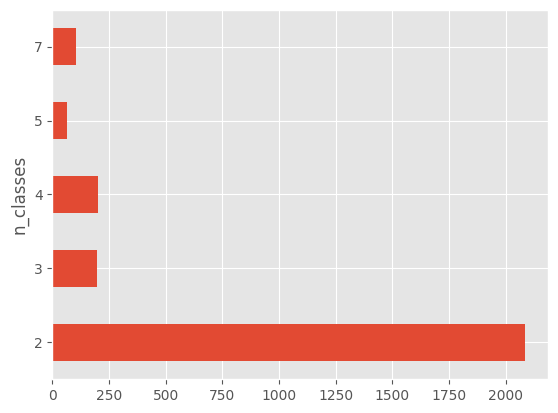

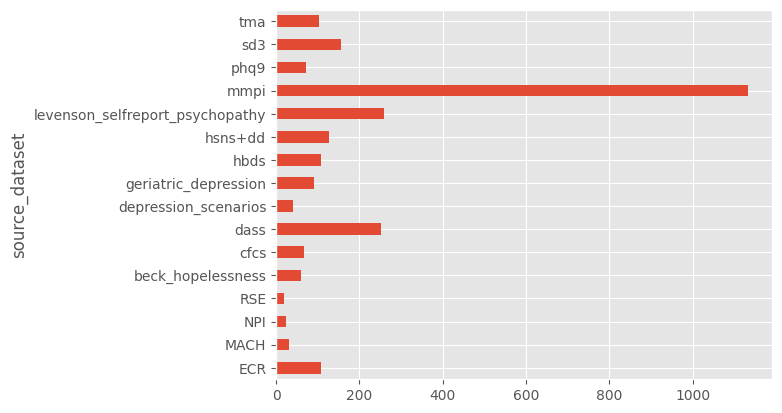

In [3]:
df.groupby("n_classes").size().plot.barh()
plt.show()
df.groupby("source_dataset").size().plot.barh();

### Load evaluation results

In [4]:
CSV_MAP: dict[str, str] = {
    "ada": "combined_v2_gpt3/classification/ada.csv",
    "babbage": "combined_v2_gpt3/classification/babbage.csv",
    "curie": "combined_v2_gpt3/classification/curie.csv",
    "davinci": "combined_v2_gpt3/classification/davinci.csv",
    "ada_rlhf": "combined_v2_gpt3_rlhf/classification/text-ada-001.csv",
    "babbage_rlhf": "combined_v2_gpt3_rlhf/classification/text-babbage-001.csv",
    "curie_rlhf": "combined_v2_gpt3_rlhf/classification/text-curie-001.csv",
    "davinci_rlhf": "combined_v2_gpt3_rlhf/classification/text-davinci-001.csv",
    "opt_125m": "combined_v2_opt/classification/opt-125m.csv",
    "opt_350m": "combined_v2_opt/classification/opt-350m.csv",
    "opt_1_3b": "combined_v2_opt/classification/opt-1.3b.csv",
    "opt_2_7b": "combined_v2_opt/classification/opt-2.7b.csv",
}

In [5]:
for k, path in CSV_MAP.items():
    cur_df = pd.read_csv("results/" + path)

    assert len(df) == len(cur_df)

    df[f"loss_{k}"] = cur_df.loss
    df[f"correct_{k}"] = cur_df.correct
    df[f"partial_credit_{k}"] = cur_df.partial_credit

df.columns.sort_values()


Index(['Q_id', 'answer_index', 'baseline_acc', 'baseline_loss', 'binarized',
       'binarized_v2', 'body', 'classes', 'correct_ada', 'correct_ada_rlhf',
       'correct_babbage', 'correct_babbage_rlhf', 'correct_curie',
       'correct_curie_rlhf', 'correct_davinci', 'correct_davinci_rlhf',
       'correct_opt_125m', 'correct_opt_1_3b', 'correct_opt_2_7b',
       'correct_opt_350m', 'editted', 'half_prompt', 'loss_ada',
       'loss_ada_rlhf', 'loss_babbage', 'loss_babbage_rlhf', 'loss_curie',
       'loss_curie_rlhf', 'loss_davinci', 'loss_davinci_rlhf', 'loss_opt_125m',
       'loss_opt_1_3b', 'loss_opt_2_7b', 'loss_opt_350m', 'n_classes',
       'no_prompt', 'partial_credit_ada', 'partial_credit_ada_rlhf',
       'partial_credit_babbage', 'partial_credit_babbage_rlhf',
       'partial_credit_curie', 'partial_credit_curie_rlhf',
       'partial_credit_davinci', 'partial_credit_davinci_rlhf',
       'partial_credit_opt_125m', 'partial_credit_opt_1_3b',
       'partial_credit_opt_2_7b

### Plotting code
[Link to model sizes](https://github.com/ed1d1a8d/inverse-scaling-eval-pipeline/blob/d7b0de68258525fddb2fb1f05091755ebaa24775/eval_pipeline/plot_loss.py#L19)

In [6]:
GPT3_SIZES = {
    # GPT-3 sizes are based on https://blog.eleuther.ai/gpt3-model-sizes/
    "ada": 350_000_000,
    "babbage": 1_300_000_000,
    "curie": 6_700_000_000,
    "davinci": 175_000_000_000,
}

GPT3_RLHF_SIZES = {
    "ada_rlhf": 350_000_000,
    "babbage_rlhf": 1_300_000_000,
    "curie_rlhf": 6_700_000_000,
    "davinci_rlhf": 175_000_000_000,
}

OPT_SIZES = {
    # opt sizes from their names
    "opt_125m": 125_000_000,
    "opt_350m": 350_000_000,
    "opt_1_3b": 1_300_000_000,
    "opt_2_7b": 2_700_000_000,
}

OGPT_SIZES = {"opt_125m": 125_000_000} | GPT3_SIZES

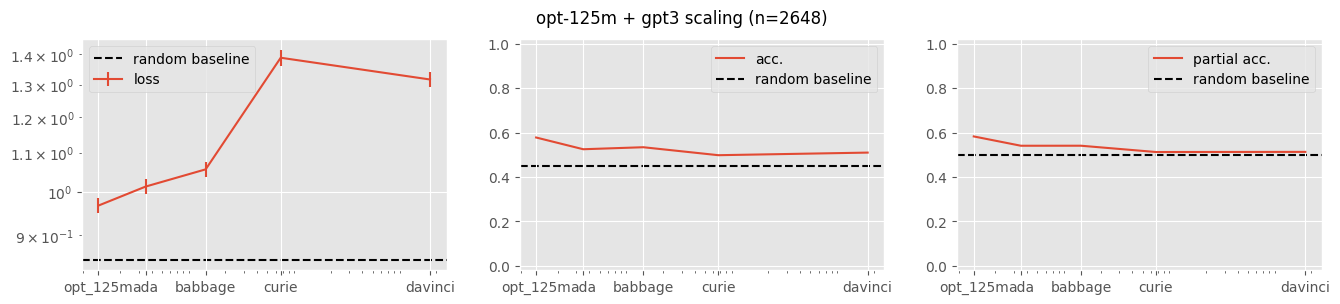

In [7]:
def gen_plots(
    df: pd.DataFrame,
    size_dict: dict[str, int],
    title: str = "",
):
    models = list(size_dict.keys())
    sizes = np.array(list(size_dict.values()))

    losses = np.array([df[f"loss_{m}"].mean() for m in models])
    loss_errs = np.array([df[f"loss_{m}"].std() for m in models]) / np.sqrt(len(df))
    accs = np.array([df[f"correct_{m}"].mean() for m in models])
    partial_accs = np.array([df[f"partial_credit_{m}"].mean() for m in models])

    plt.figure(figsize=(16, 3))
    plt.suptitle(title + f" (n={len(df)})")
    plt.tight_layout()

    def common_plot_setup(baseline: float):
        plt.axhline(
            baseline,
            linestyle="--",
            color="black",
            zorder=-1,
            label="random baseline",
        )
        plt.xscale("log")
        # plt.xlabel("Model size")
        plt.xticks(sizes, models)
        plt.legend()

    # Loss
    plt.subplot(1, 3, 1)
    plt.errorbar(sizes, losses, loss_errs, label="loss")
    plt.yscale("log")
    common_plot_setup(df.baseline_loss.mean())

    # Acc
    plt.subplot(1, 3, 2)
    plt.plot(sizes, accs, label="acc.")
    plt.ylim(-0.02, 1.02)
    common_plot_setup(df.baseline_acc.mean())

    # Partial acc
    plt.subplot(1, 3, 3)
    plt.plot(sizes, partial_accs, label="partial acc.")
    plt.ylim(-0.02, 1.02)
    common_plot_setup(0.5)


gen_plots(df, OGPT_SIZES, title="opt-125m + gpt3 scaling")


In [8]:
def comprehensive_plot(df: pd.DataFrame, name: str):
    gen_plots(df, OPT_SIZES, title=f"{name} - OPT Scaling")
    gen_plots(df, GPT3_SIZES, title=f"{name} - GPT3 Scaling")
    gen_plots(df, GPT3_RLHF_SIZES, title=f"{name} - GPT3 (rlhf) Scaling")

### Partial credit analysis
Partial credit is almost never used!

In [9]:
def plot_partial_credit_distributions(df: pd.DataFrame, size_dict: dict[str, int]):
    plt.figure(figsize=(12, 2))
    
    n_models = len(size_dict)
    for i, model in enumerate(size_dict.keys()):
        plt.subplot(1, n_models, i + 1)
        df["tmp"] = df[f"partial_credit_{model}"].round(2)
        df.groupby(f"tmp").size().plot.bar();
        plt.title(model)

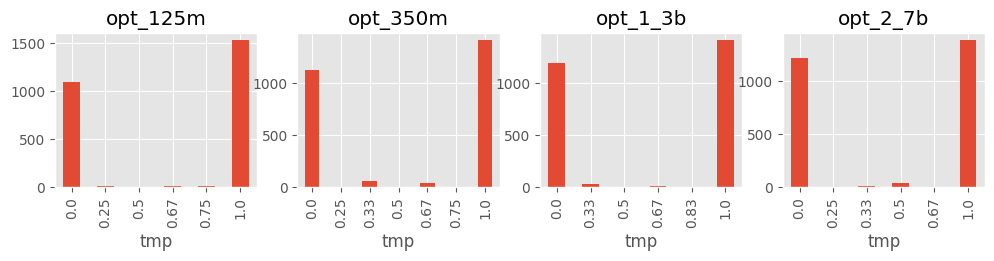

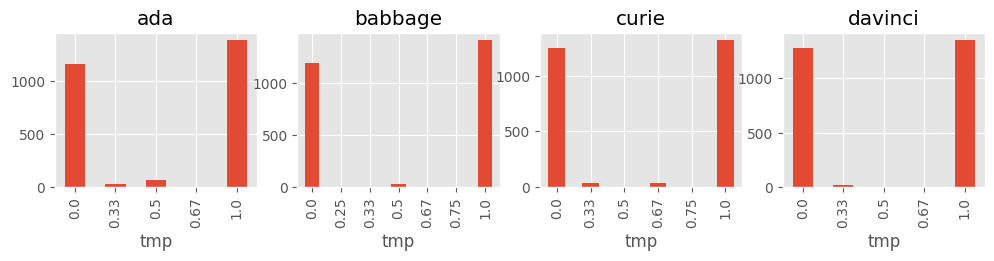

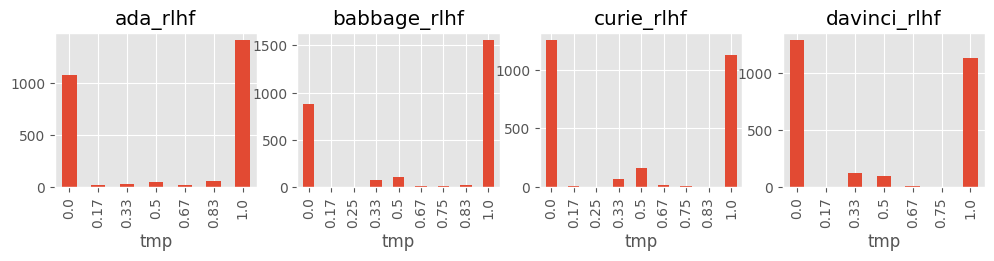

In [10]:
plot_partial_credit_distributions(df, OPT_SIZES)
plot_partial_credit_distributions(df, GPT3_SIZES)
plot_partial_credit_distributions(df, GPT3_RLHF_SIZES)

# Scaling laws by dataset


### All data

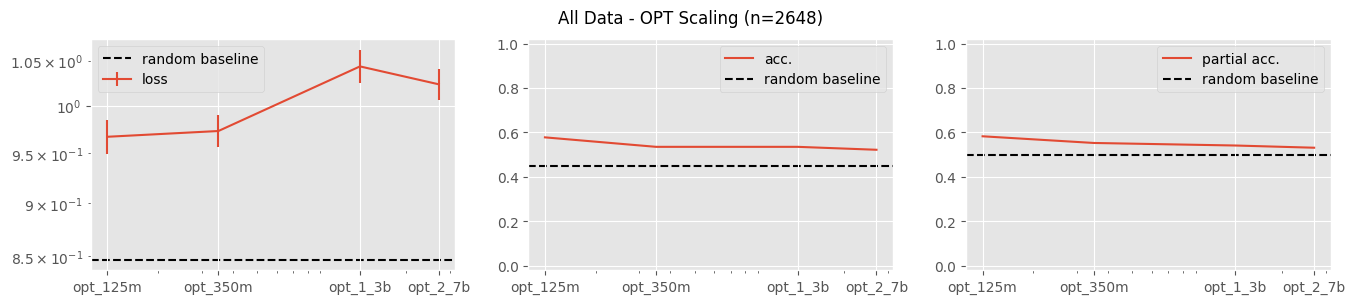

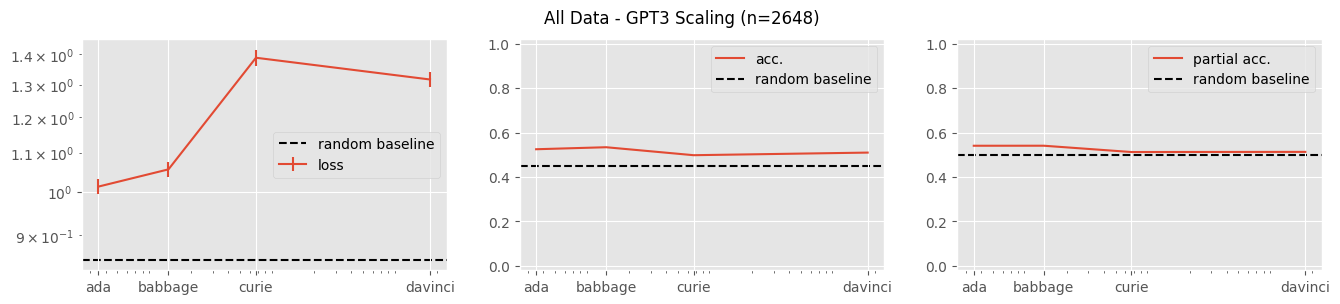

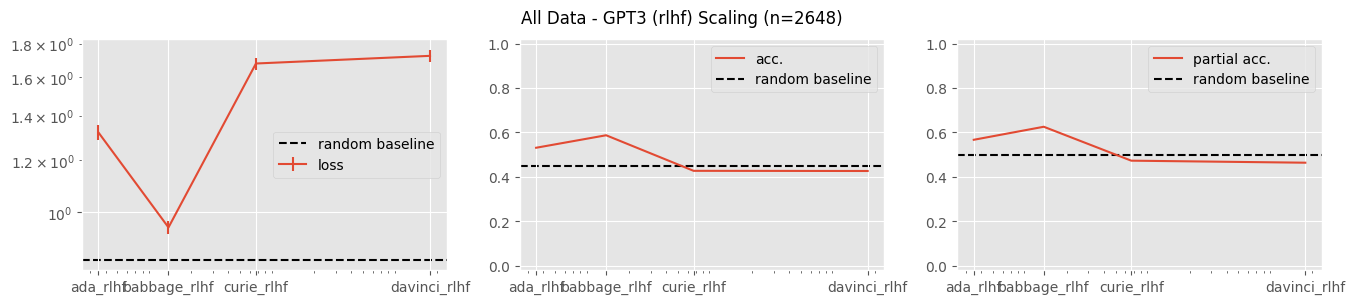

In [12]:
comprehensive_plot(df, name="All Data")

### Prompts

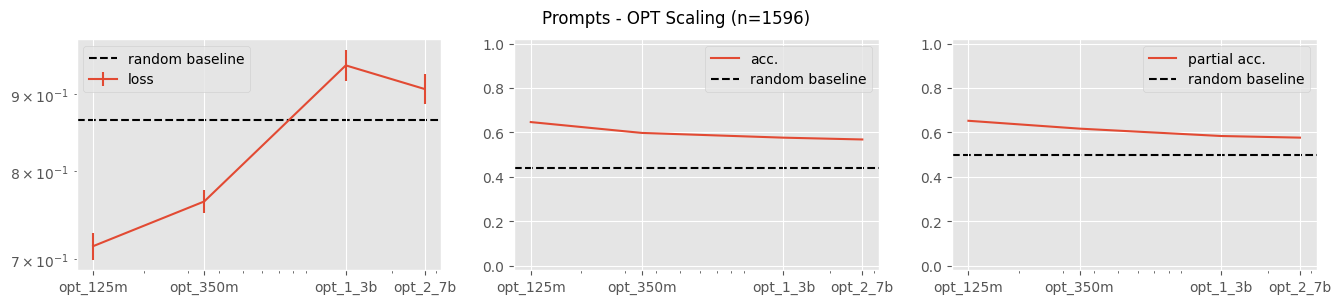

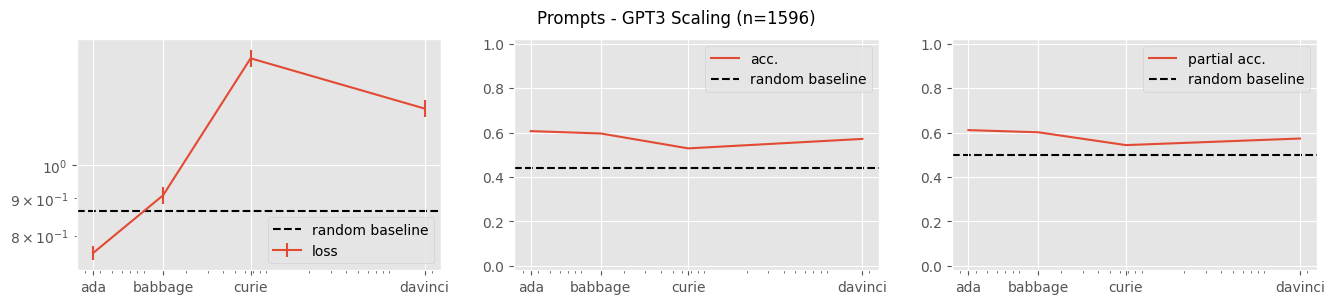

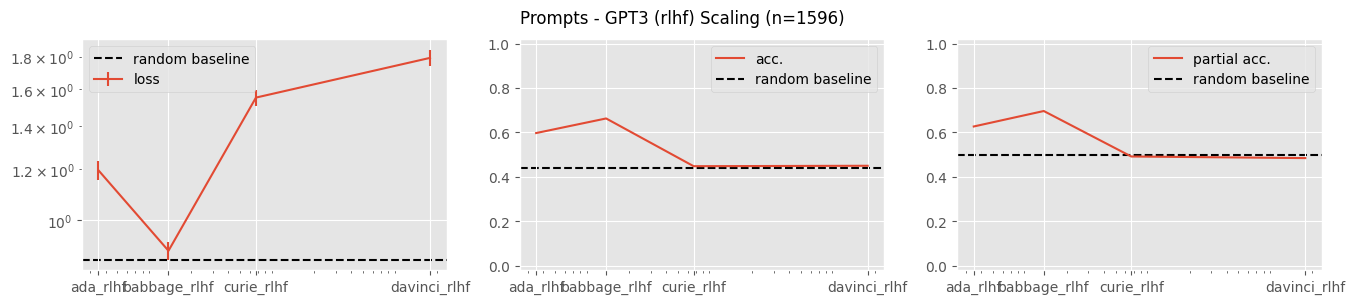

In [13]:
comprehensive_plot(df[df.no_prompt.isna()], name="Prompts")

### No prompts

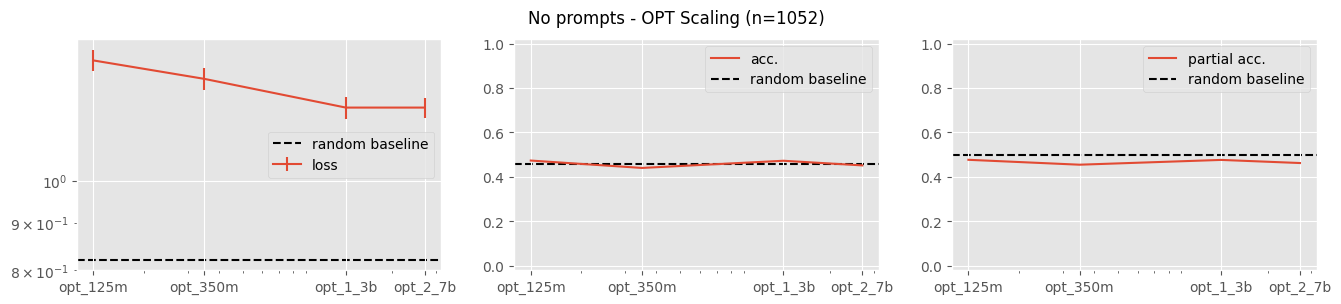

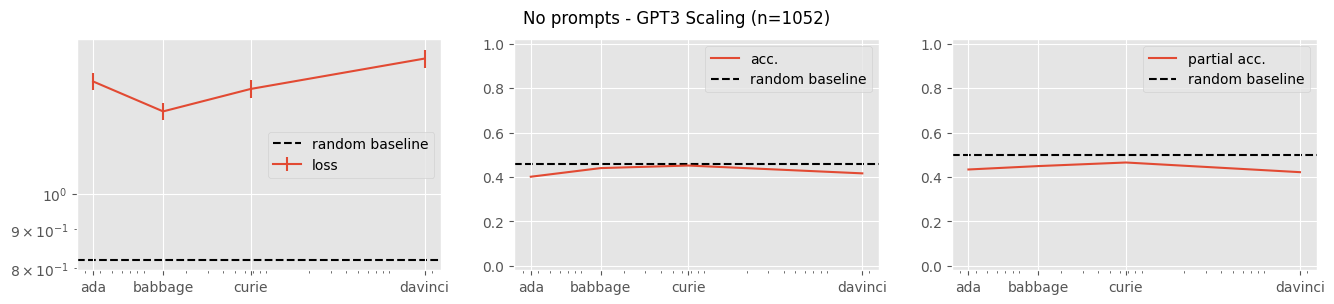

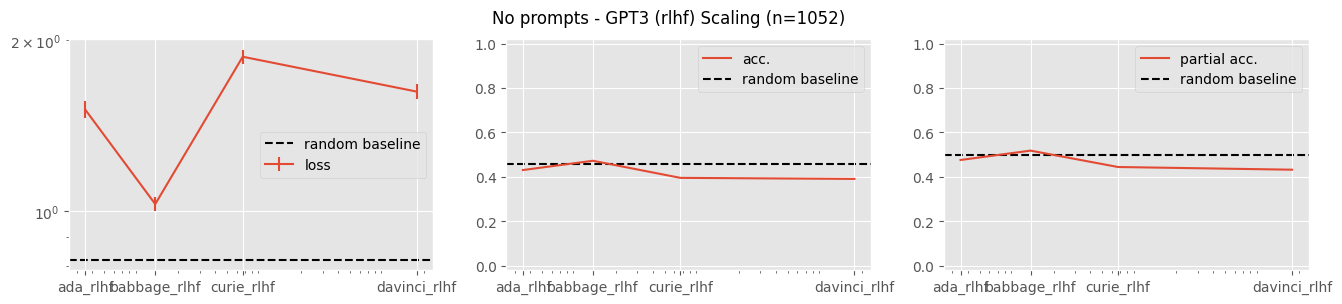

In [14]:
comprehensive_plot(df[~df.no_prompt.isna() | (df.source_dataset == "ECR")], name="No prompts")

### Non-body

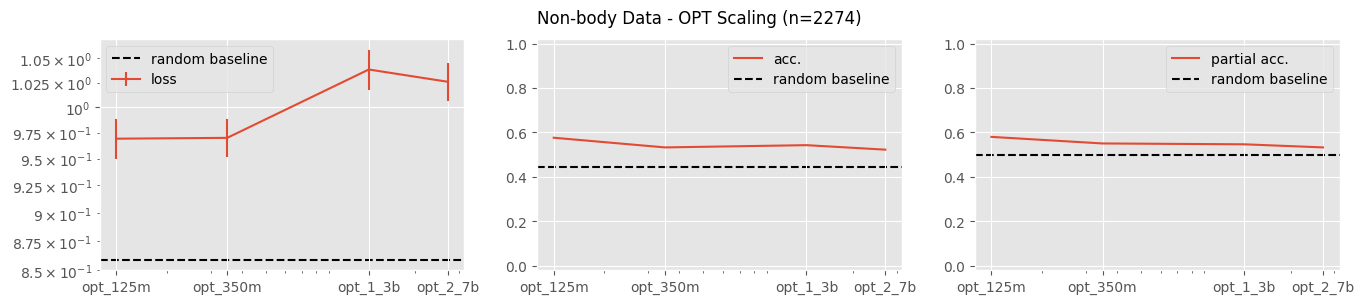

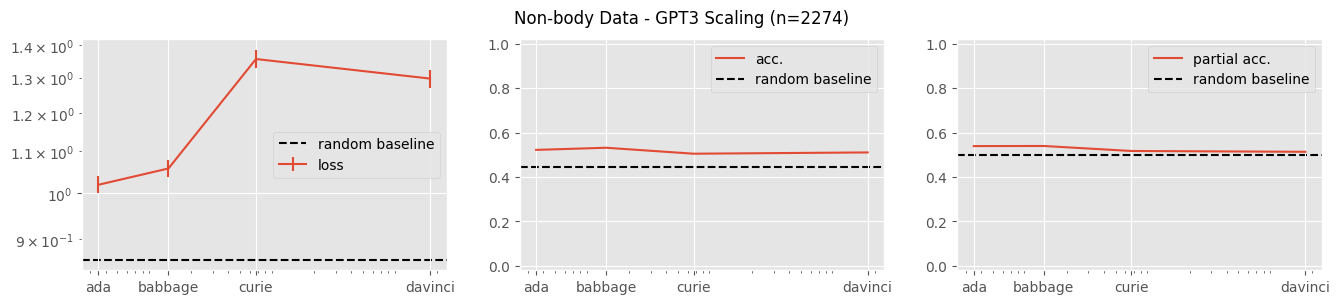

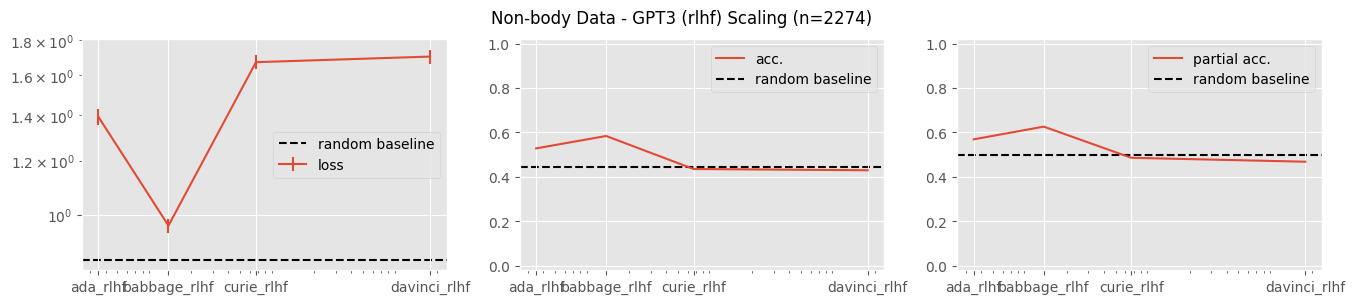

In [15]:
comprehensive_plot(df[~df.body], name="Non-body Data")

### Binary data

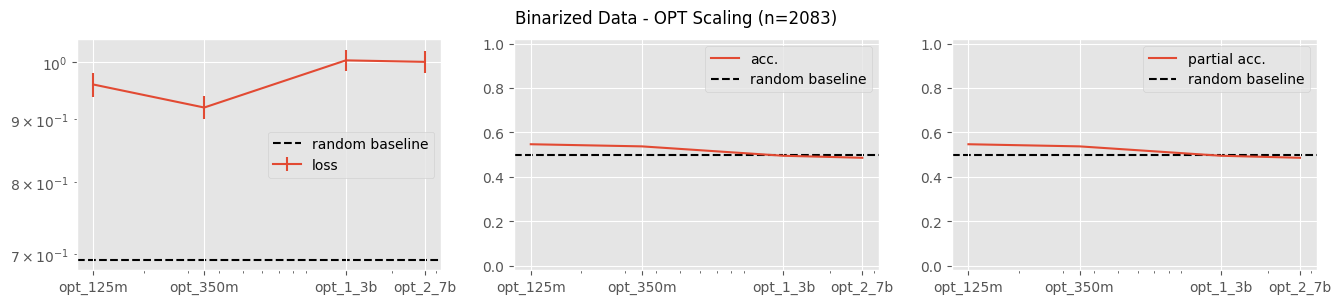

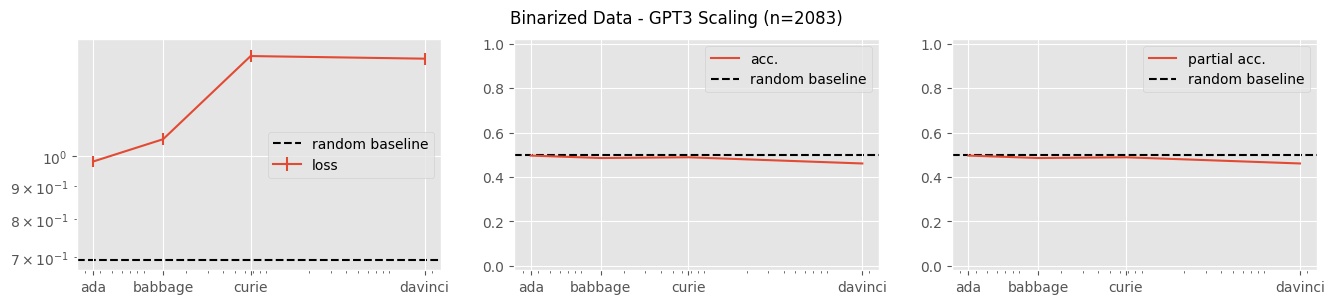

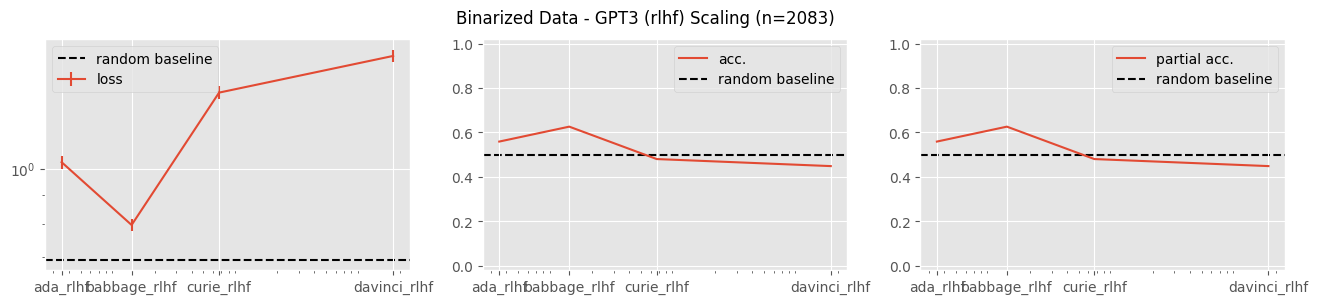

In [16]:
comprehensive_plot(df[df.binarized], name="Binarized Data")

### Prompt in front

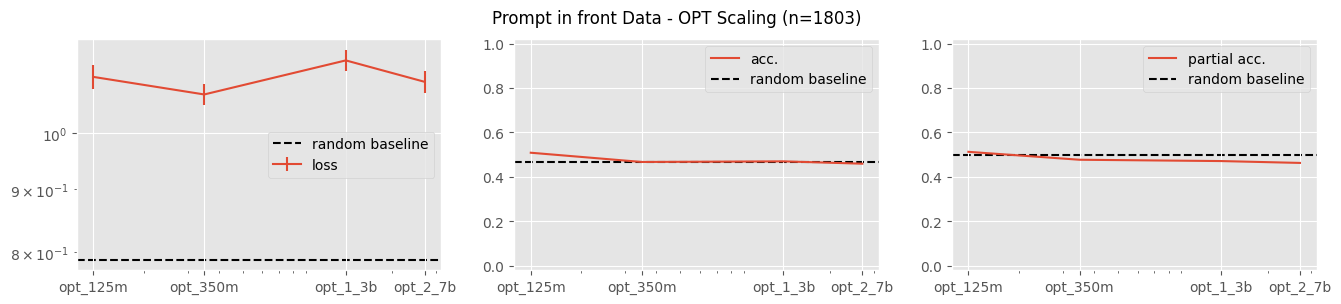

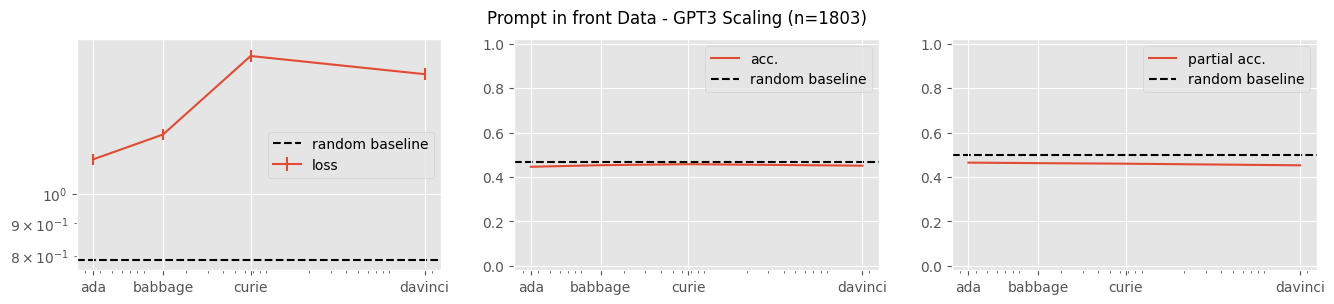

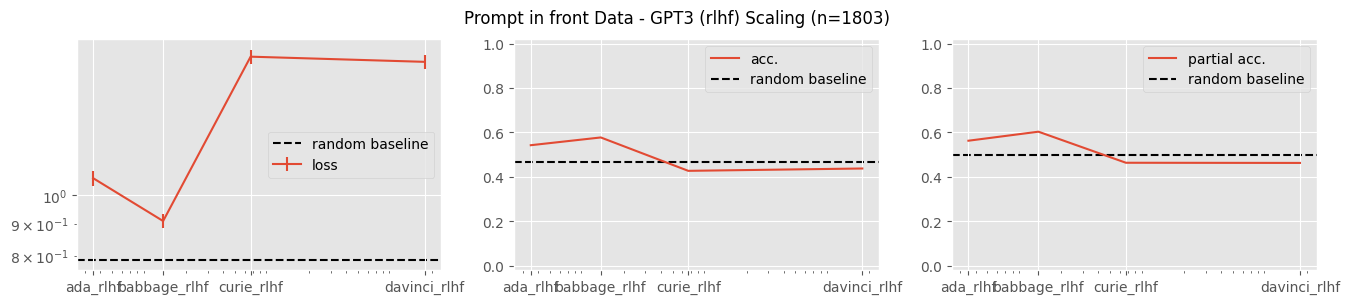

In [17]:
comprehensive_plot(df[df.prompt_in_front], name="Prompt in front Data")

### Prompt in back

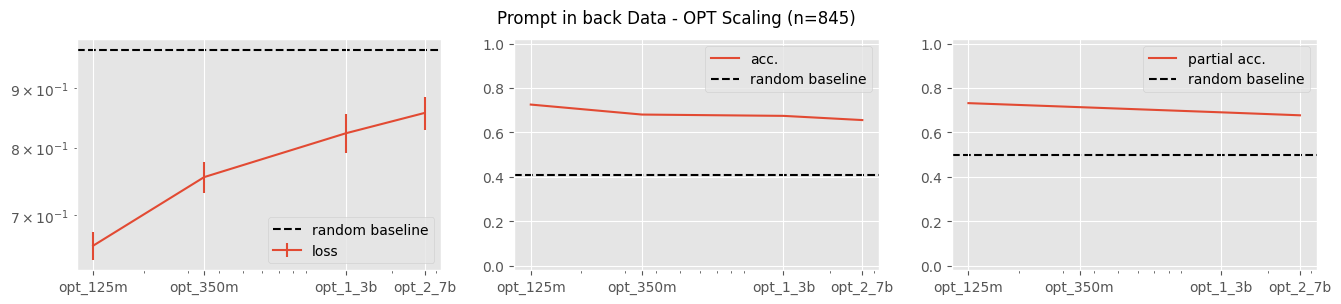

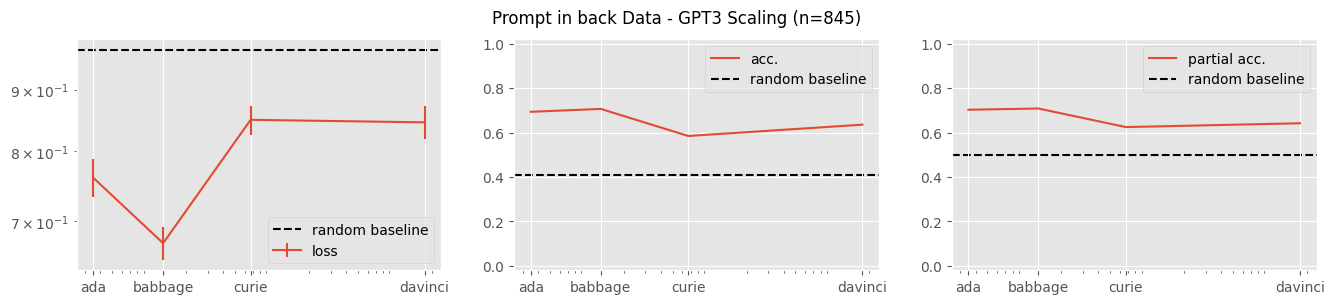

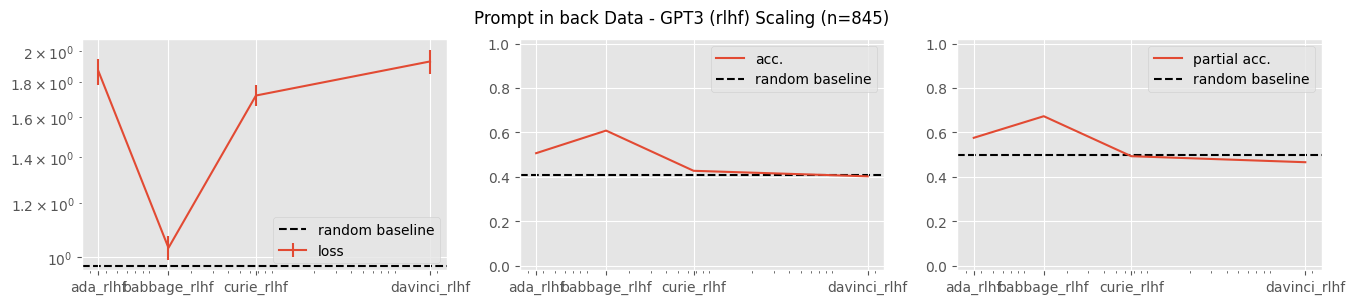

In [18]:
comprehensive_plot(df[~df.prompt_in_front], name="Prompt in back Data")

### MACH

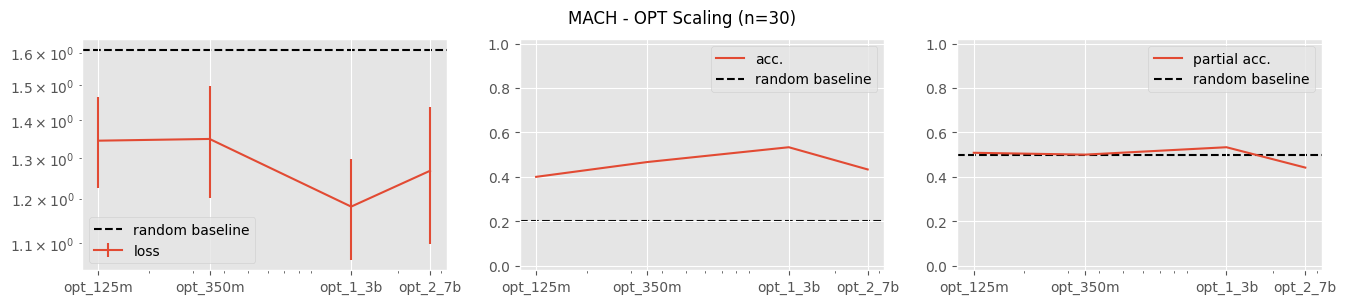

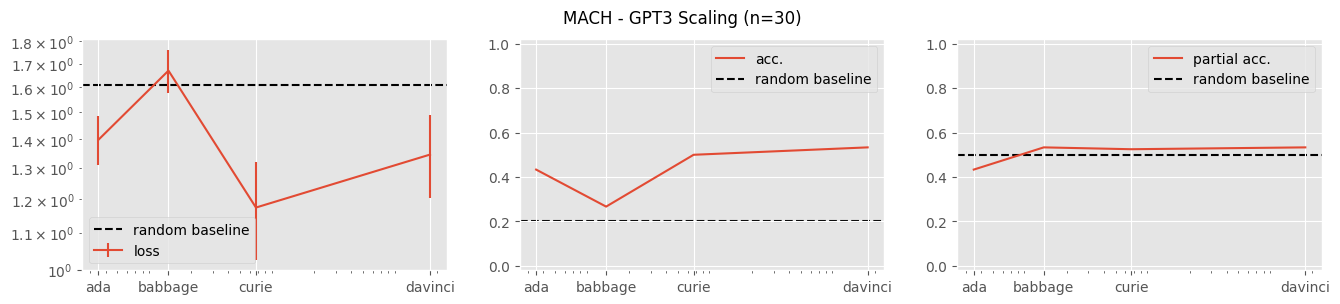

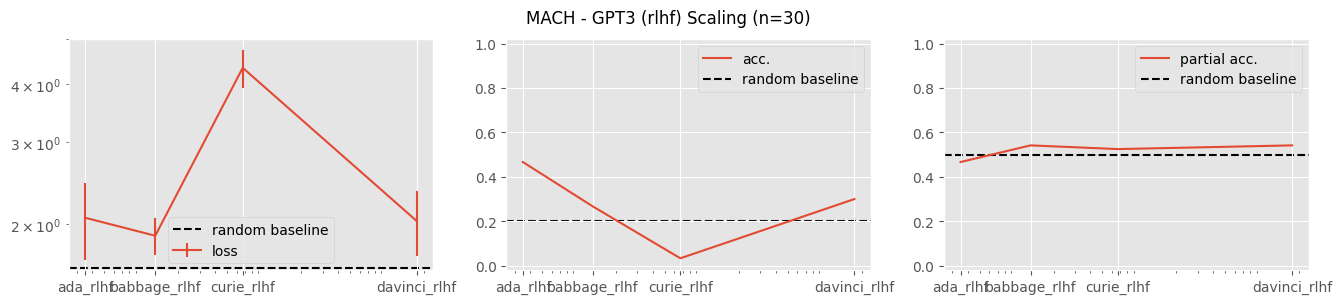

In [19]:
comprehensive_plot(df[df.source_dataset == "MACH"], name="MACH")

### NPI

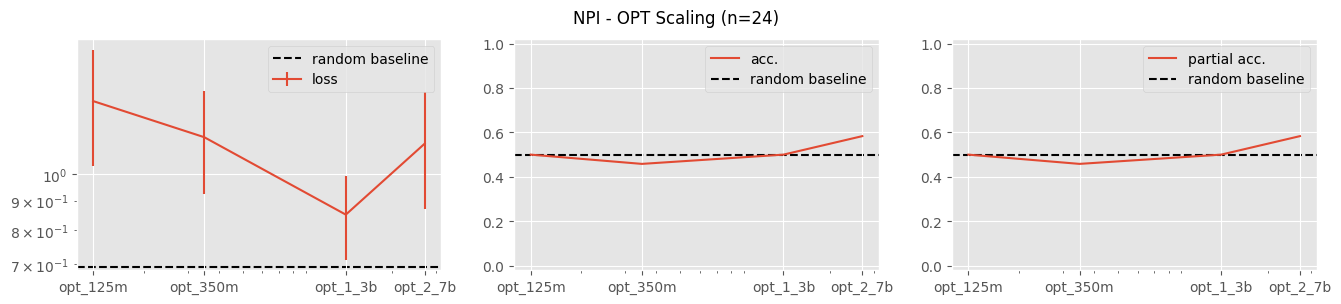

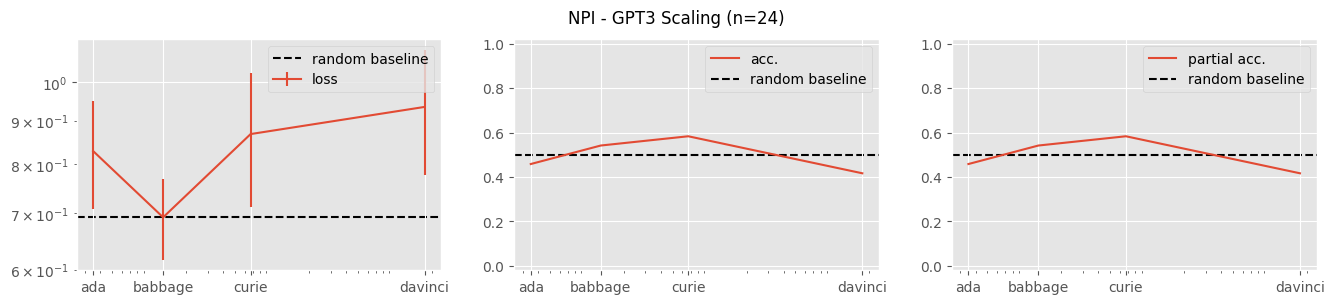

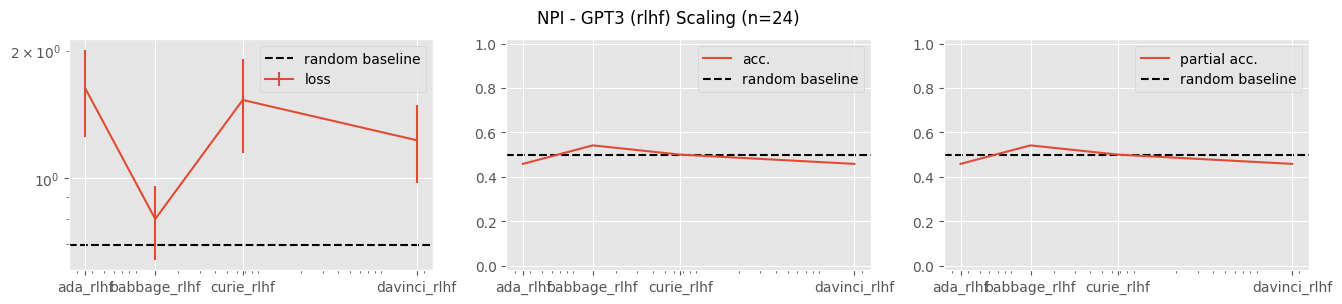

In [20]:
comprehensive_plot(df[df.source_dataset == "NPI"], name="NPI")

### RSE

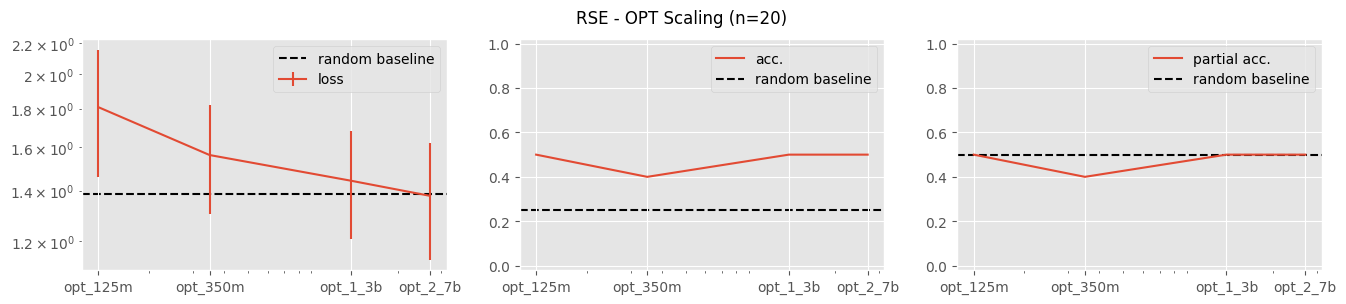

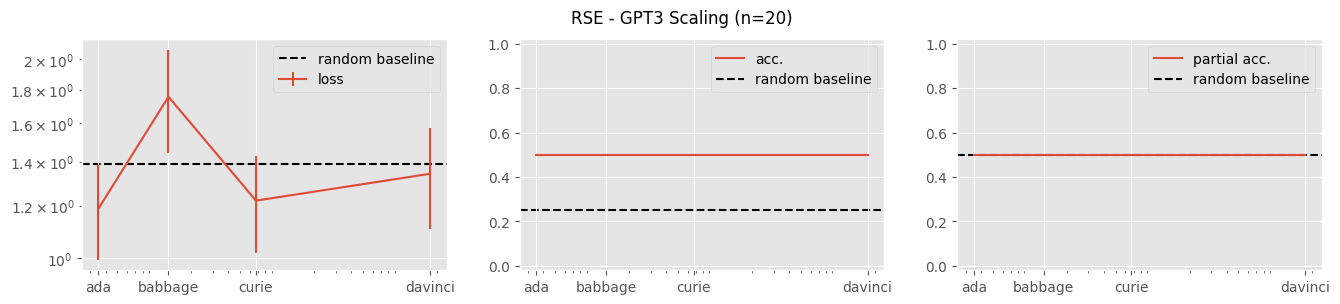

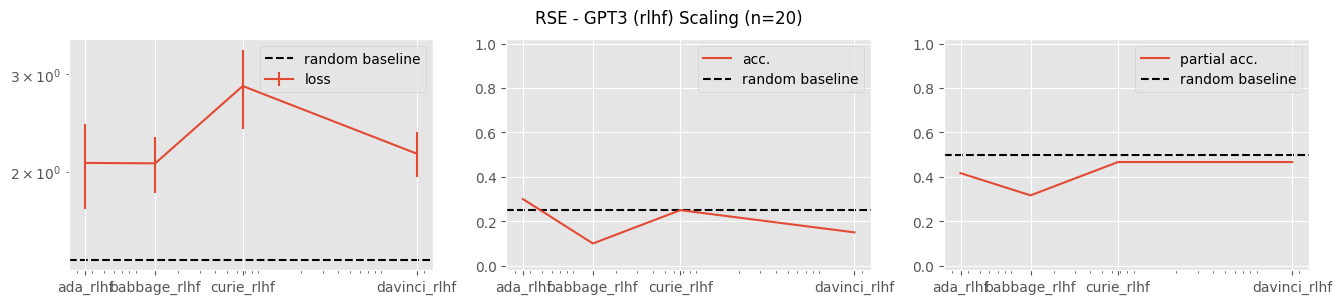

In [21]:
comprehensive_plot(df[df.source_dataset == "RSE"], name="RSE")

### DASS

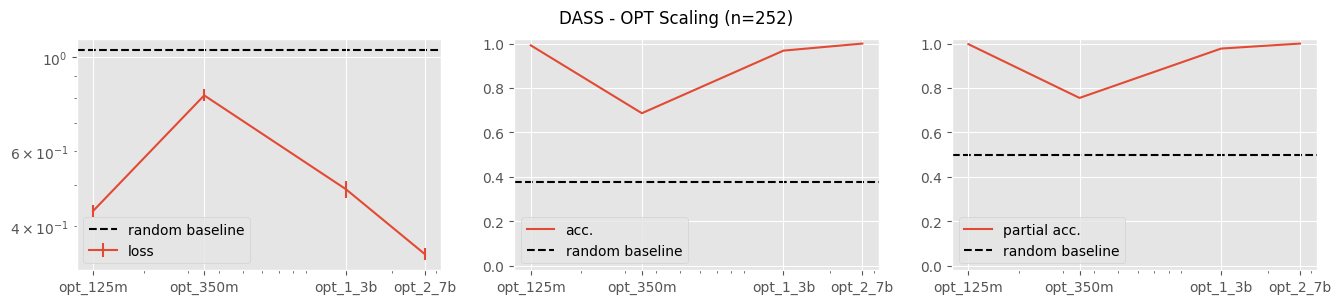

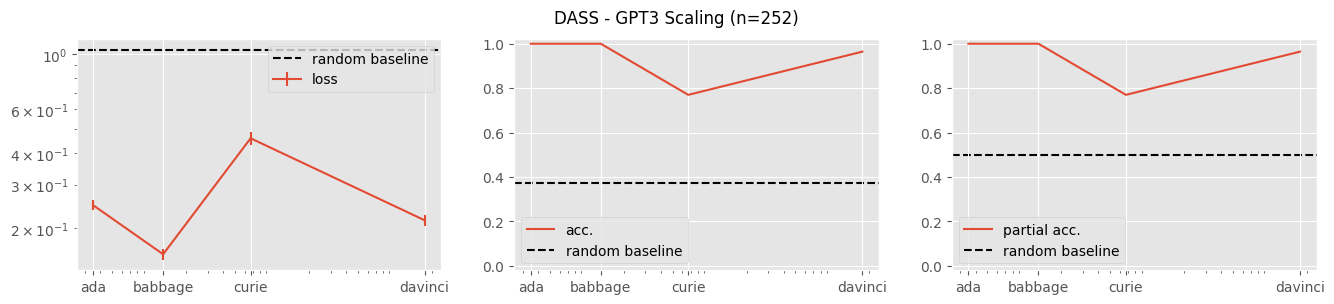

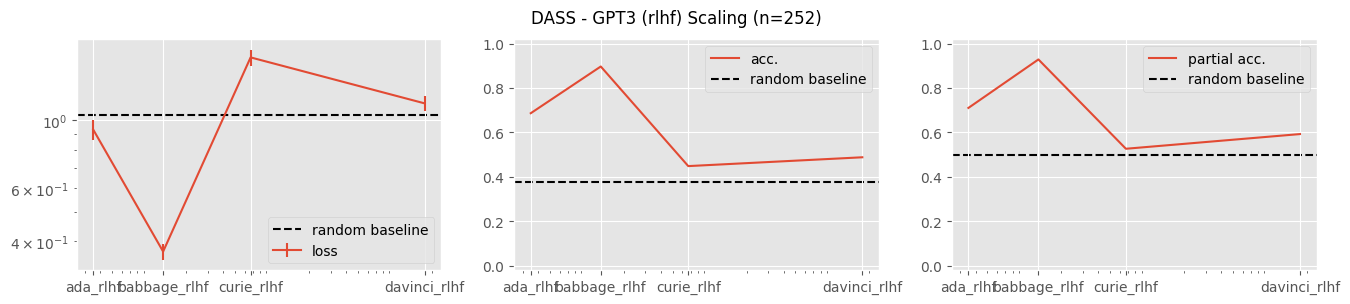

In [22]:
comprehensive_plot(df[df.source_dataset == "dass"], name="DASS")

### TMA

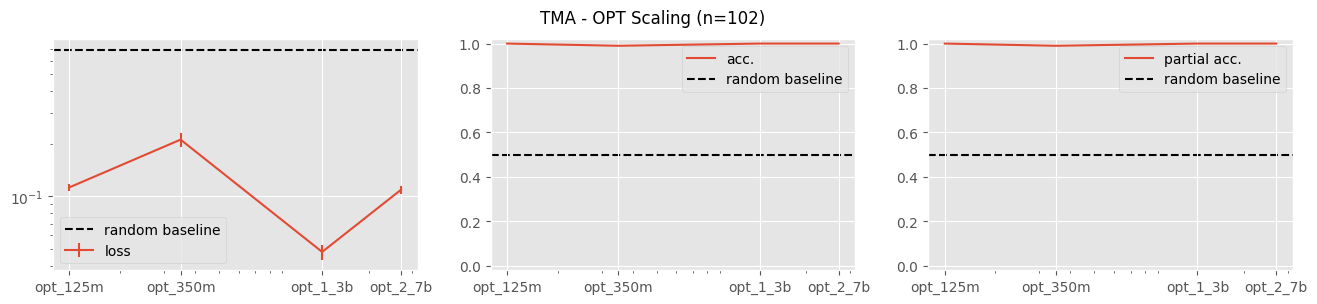

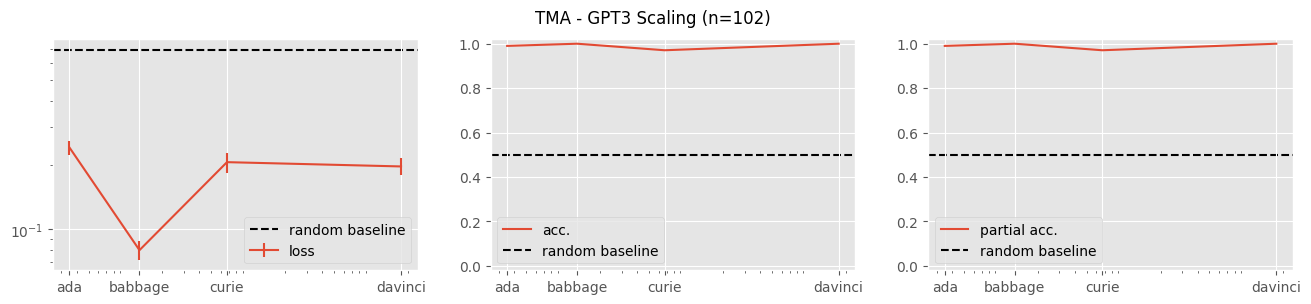

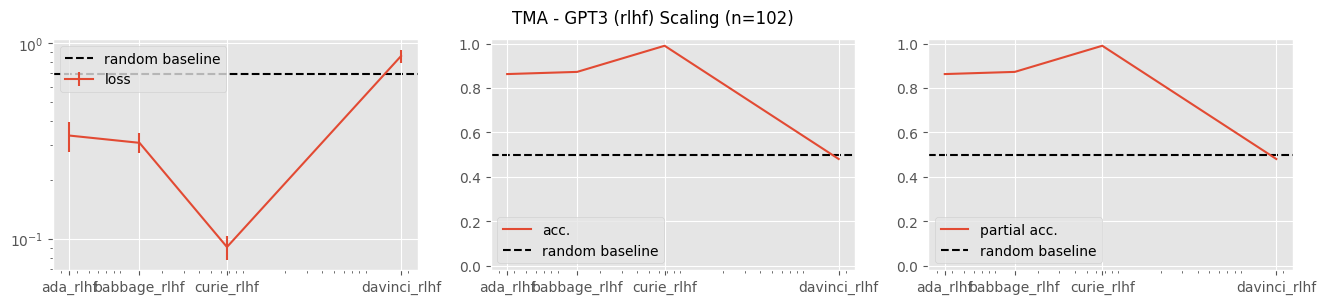

In [23]:
comprehensive_plot(df[df.source_dataset == "tma"], name="TMA")

### Beck hopelessness

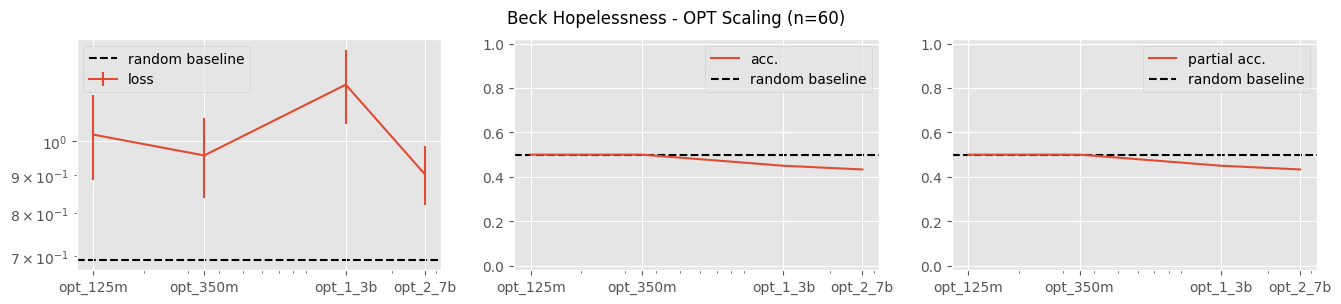

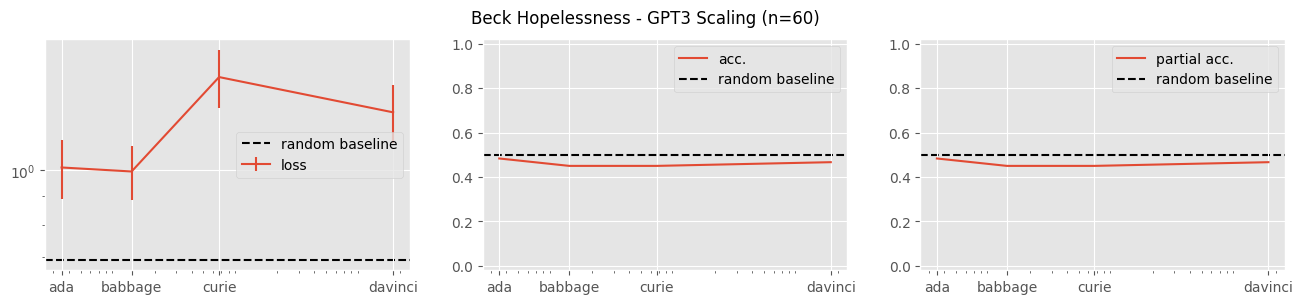

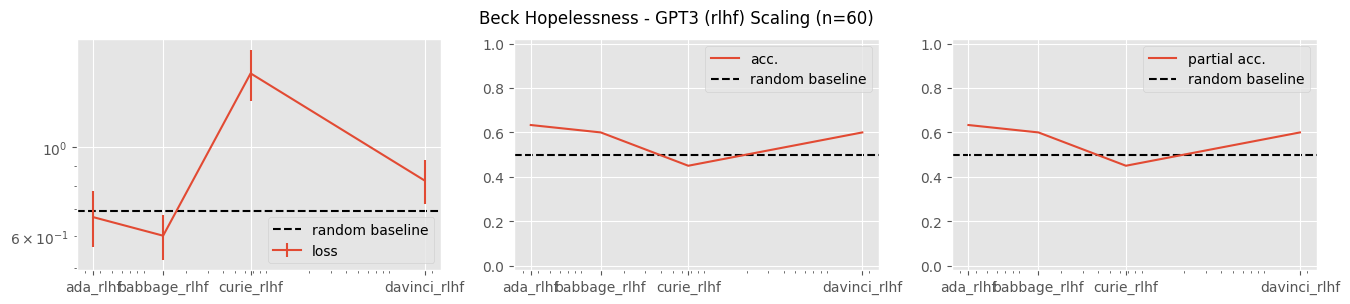

In [24]:
comprehensive_plot(
    df[df.source_dataset == "beck_hopelessness"], name="Beck Hopelessness"
)

### Depression scenarios (Simon)

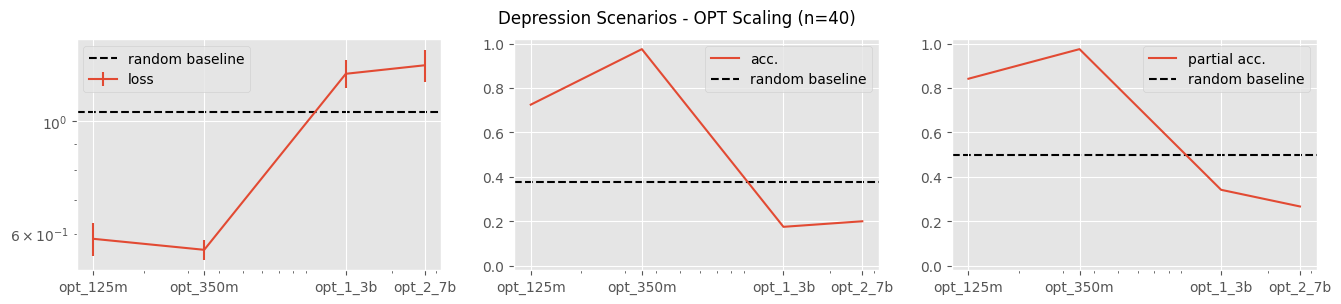

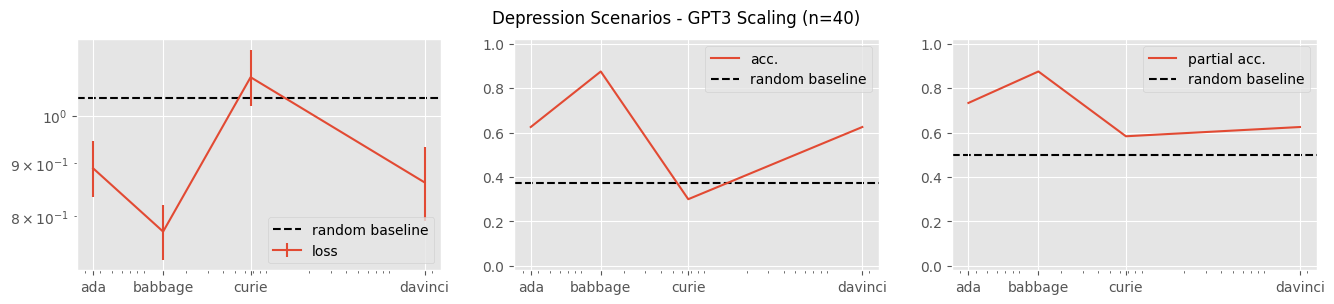

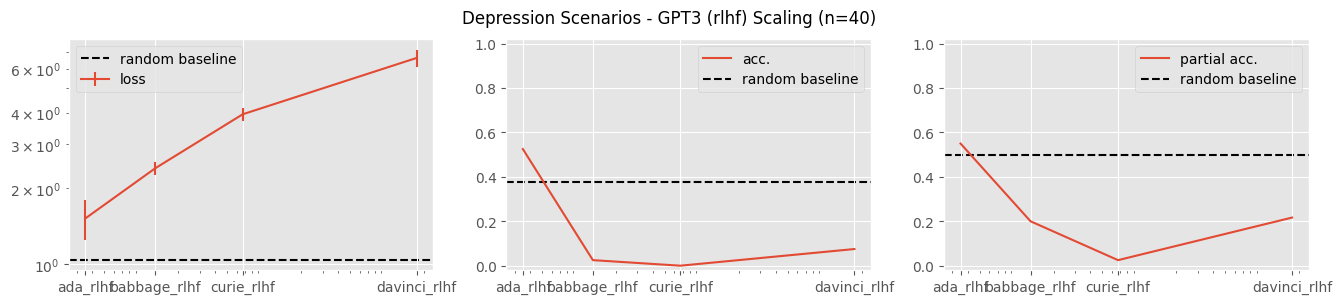

In [25]:
comprehensive_plot(
    df[df.source_dataset == "depression_scenarios"], name="Depression Scenarios"
)

### Geriatric depression

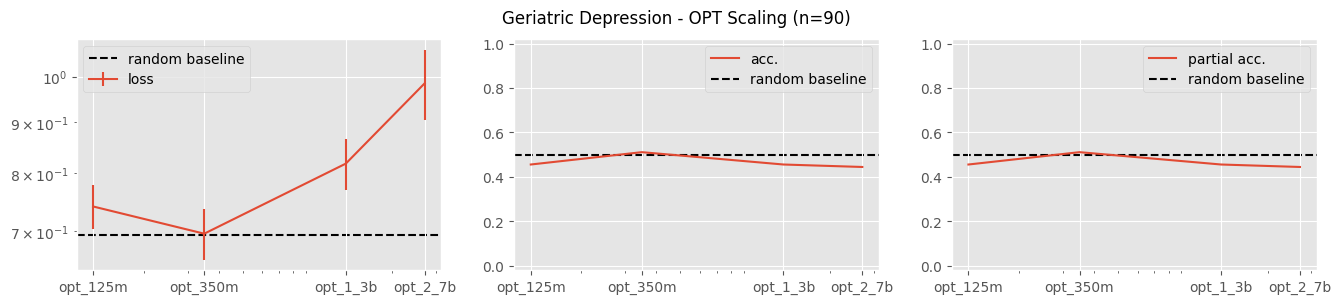

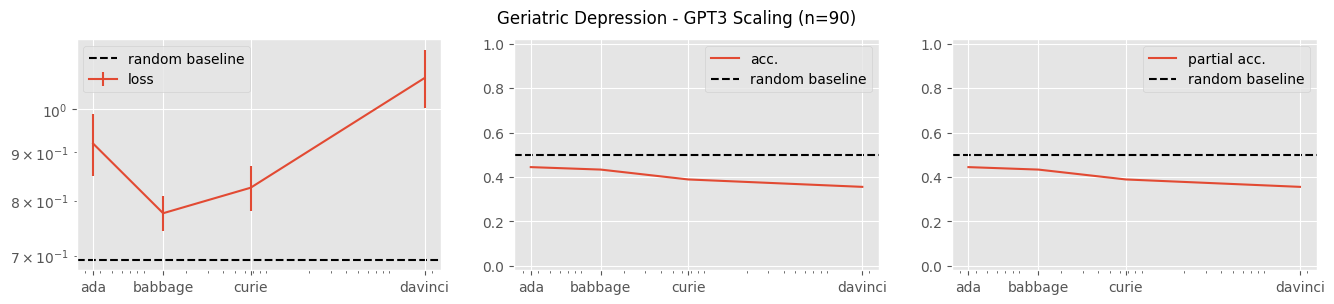

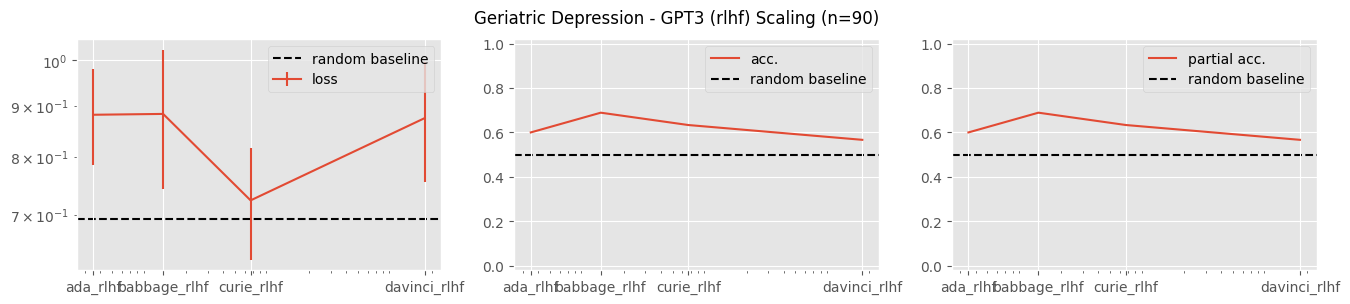

In [26]:
comprehensive_plot(
    df[(df.source_dataset == "geriatric_depression")],
    name="Geriatric Depression",
)

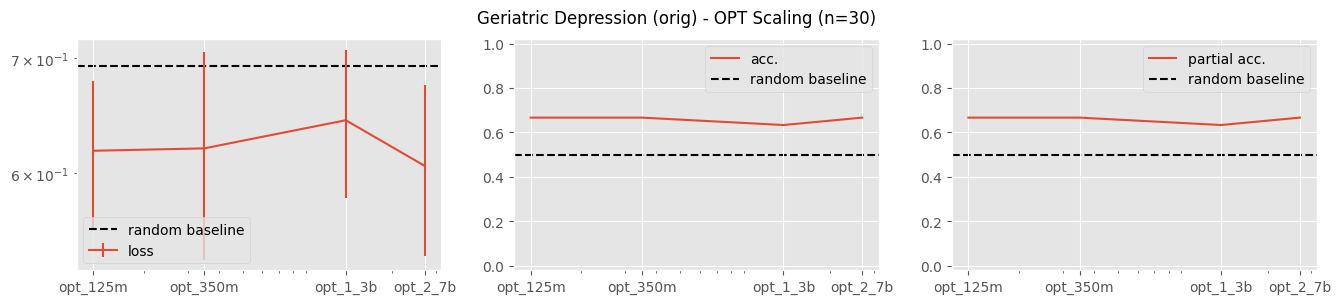

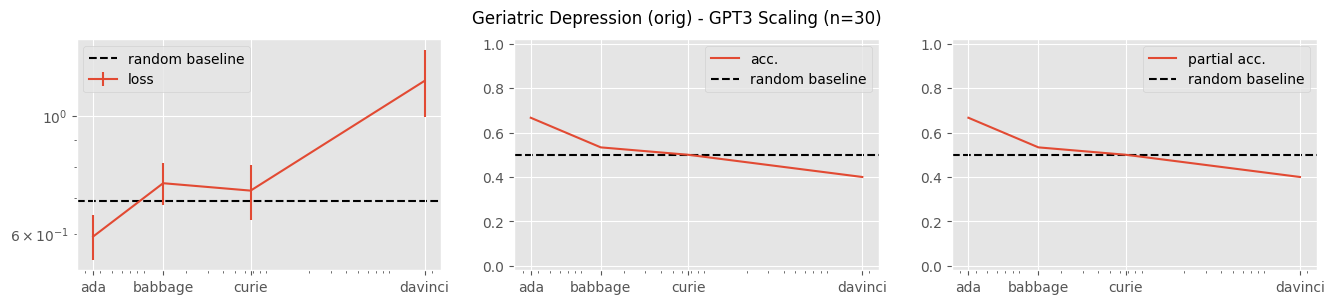

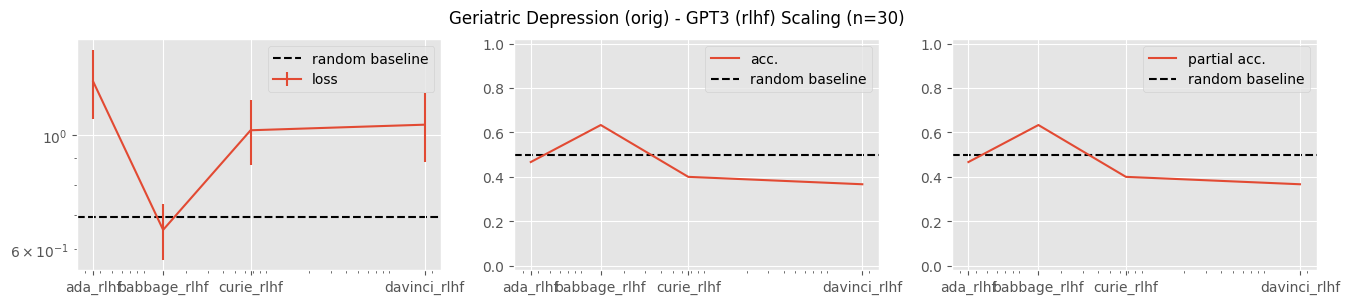

In [27]:
comprehensive_plot(
    df[(df.source_dataset == "geriatric_depression") & df.no_prompt],
    name="Geriatric Depression (orig)",
)


### Levenson Psychopathy

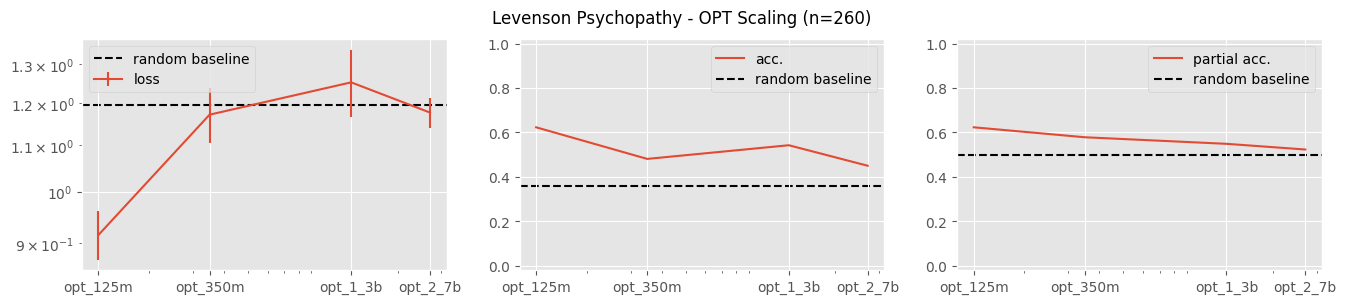

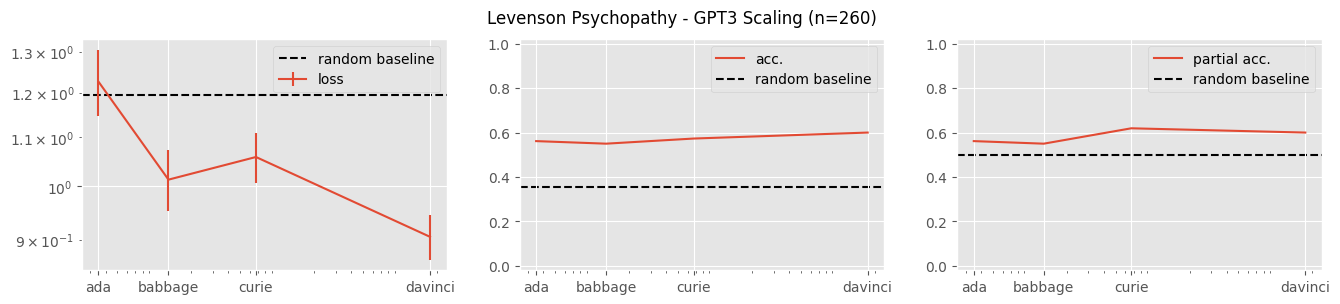

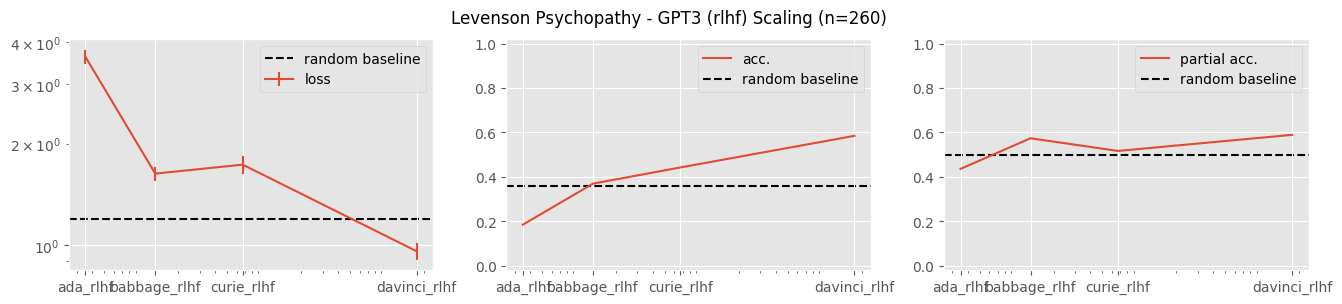

In [28]:
comprehensive_plot(
    df[(df.source_dataset == "levenson_selfreport_psychopathy")],
    name="Levenson Psychopathy",
)

### MMPI

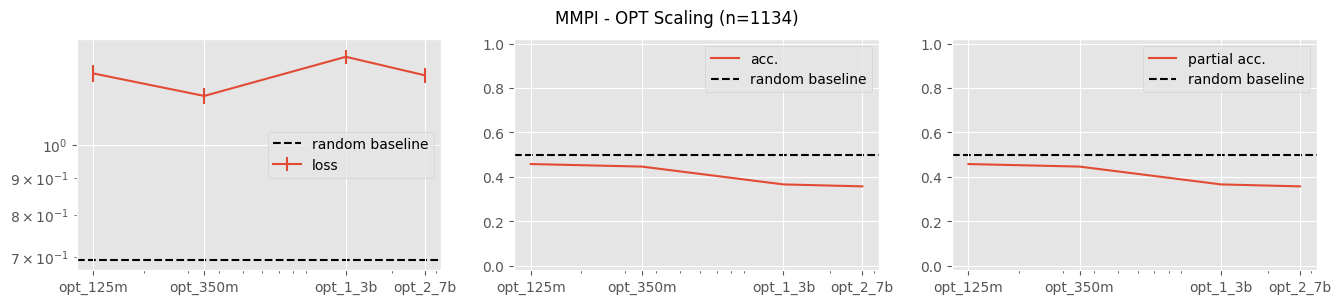

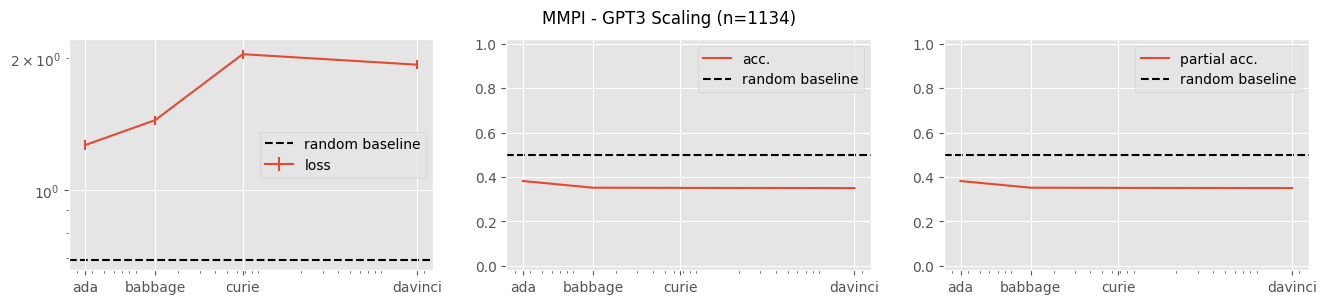

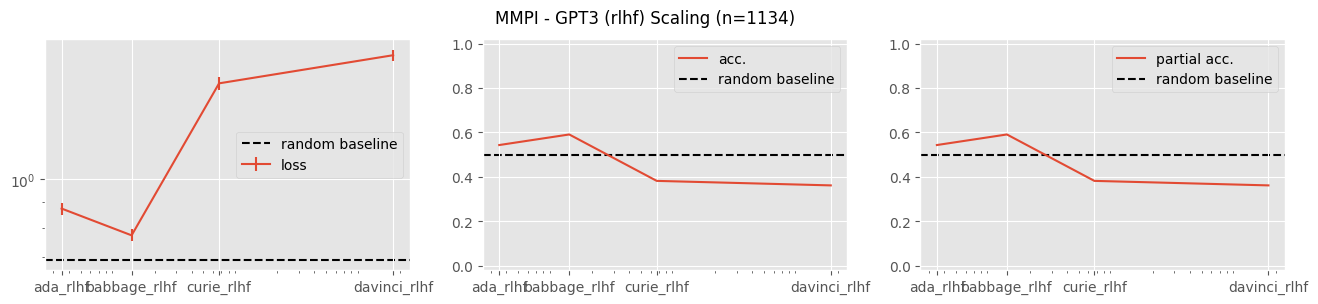

In [29]:
comprehensive_plot(df[df.source_dataset == "mmpi"], name="MMPI")

### PHQ9

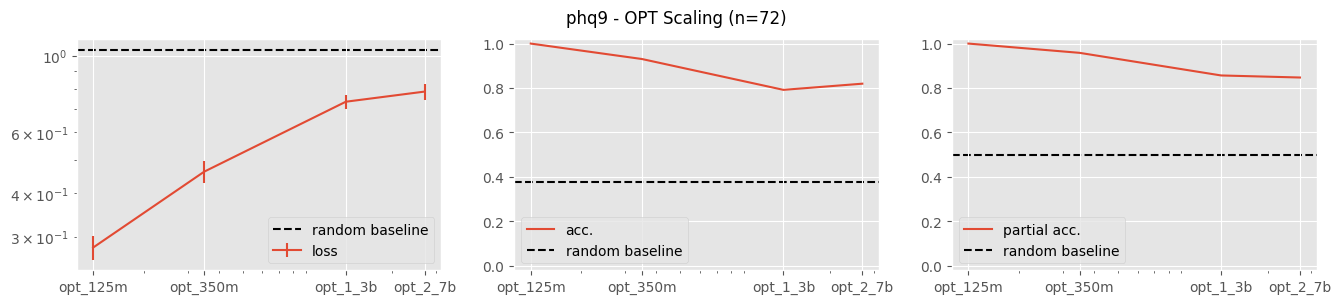

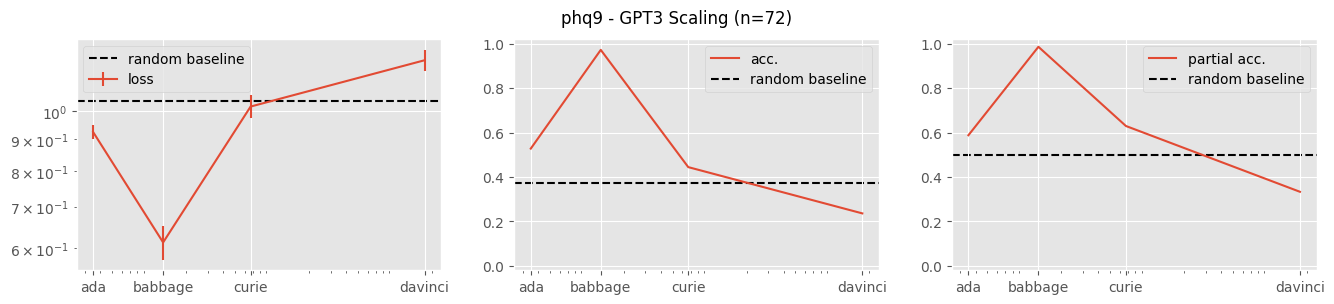

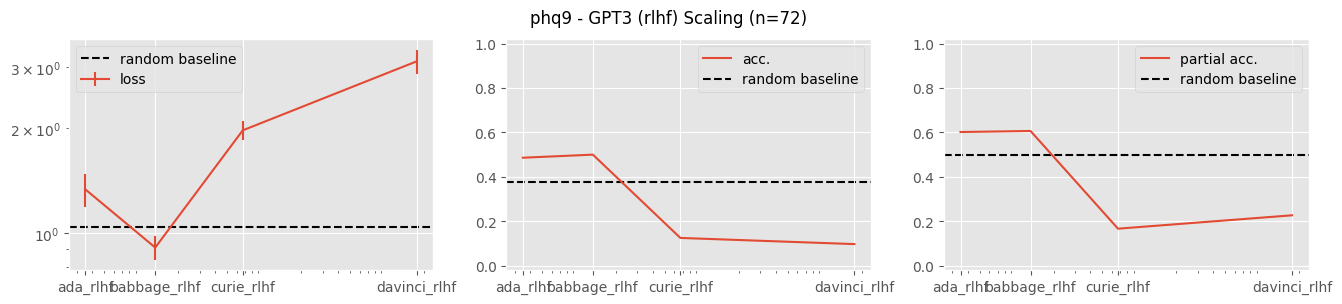

In [30]:
comprehensive_plot(df[df.source_dataset == "phq9"], name="phq9")

### CFCS

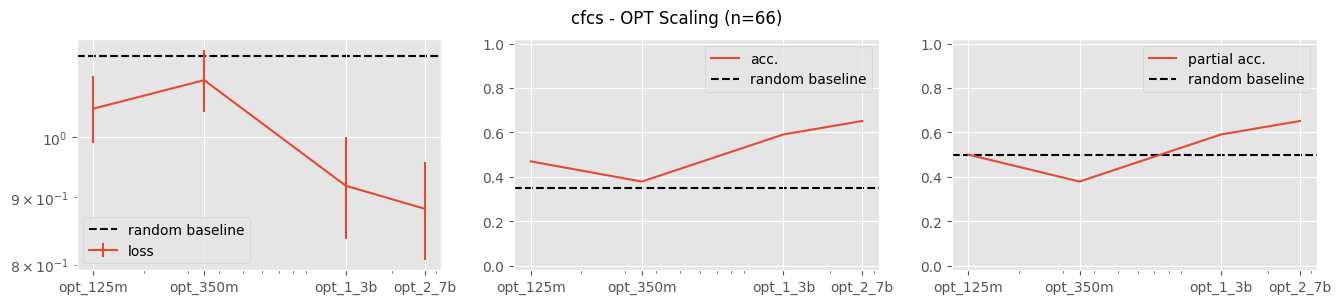

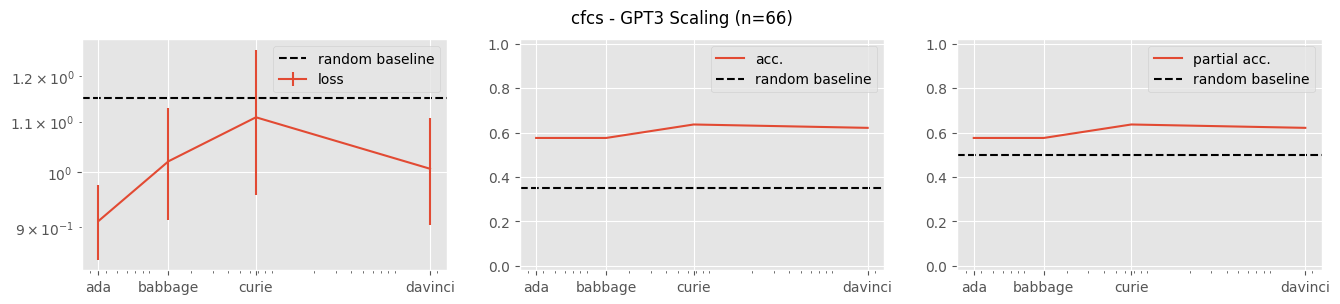

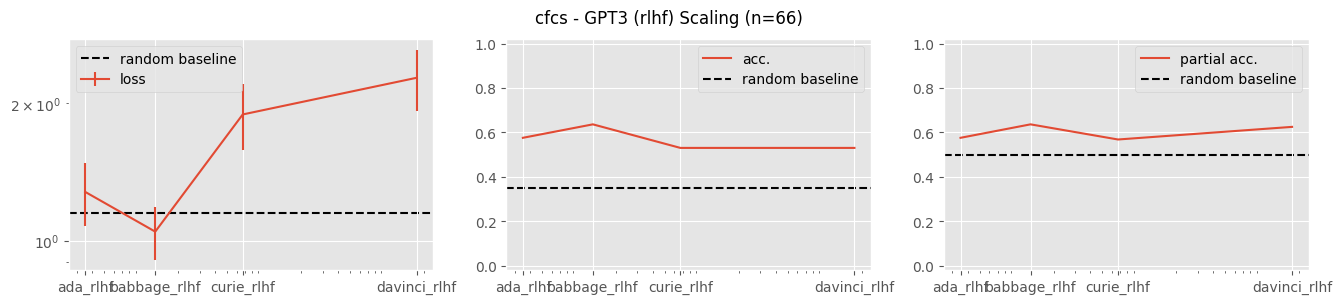

In [31]:
comprehensive_plot(df[df.source_dataset == "cfcs"], name="cfcs")

### HBDS

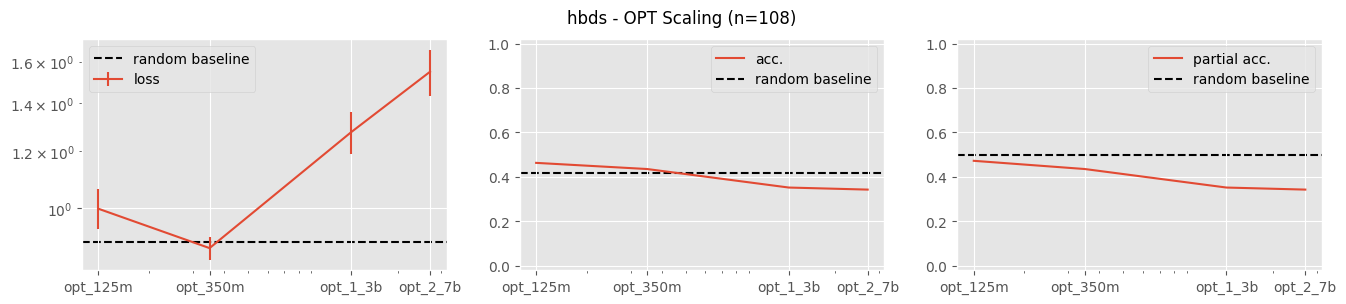

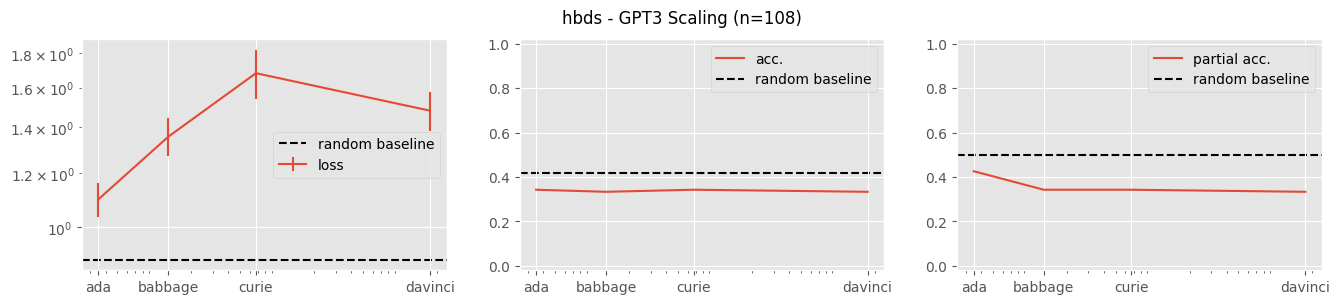

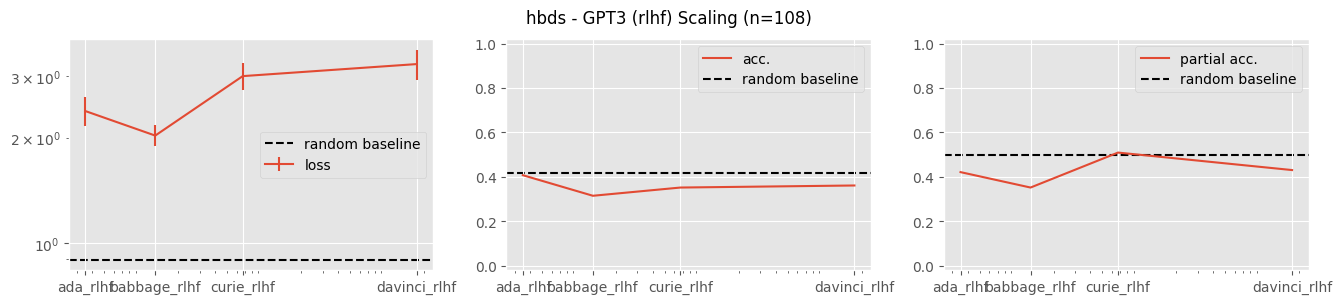

In [32]:
comprehensive_plot(df[df.source_dataset == "hbds"], name="hbds")

### HSNS+DD

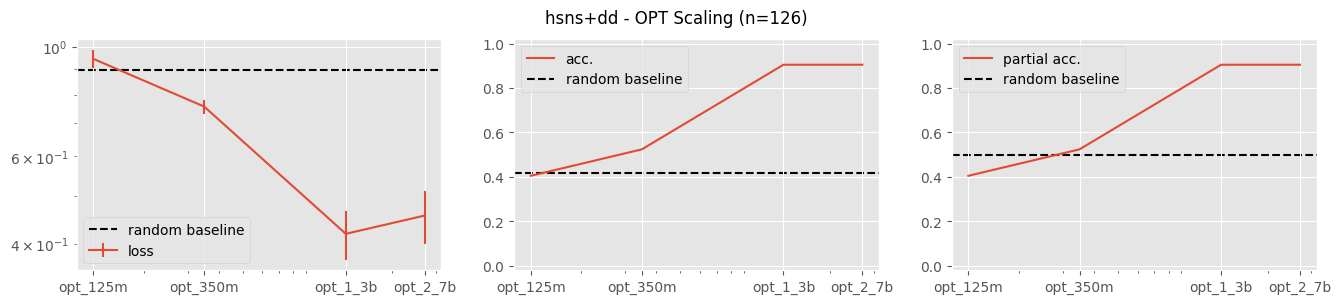

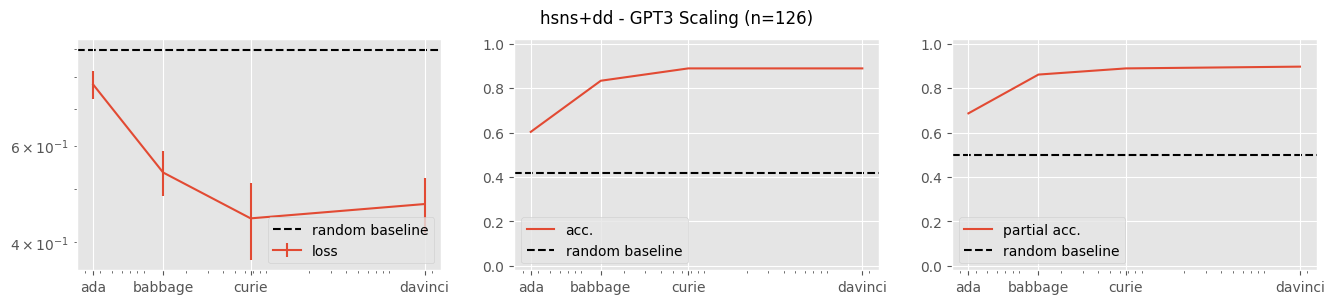

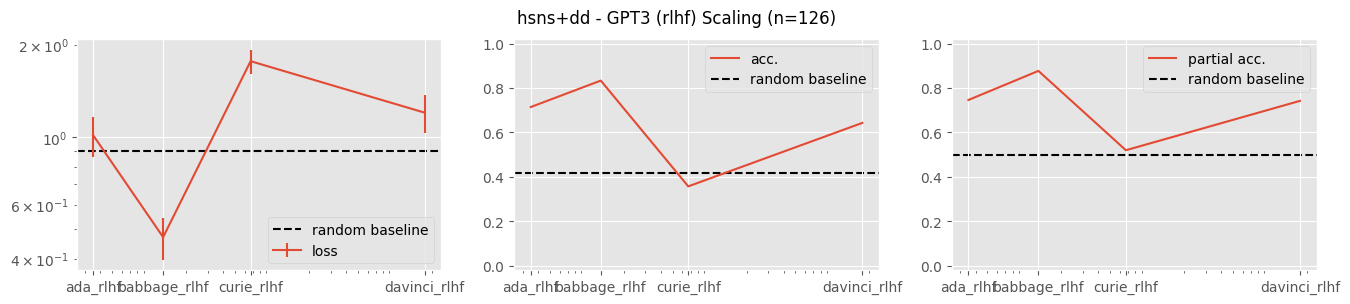

In [33]:
comprehensive_plot(df[df.source_dataset == "hsns+dd"], name="hsns+dd")

### SD3

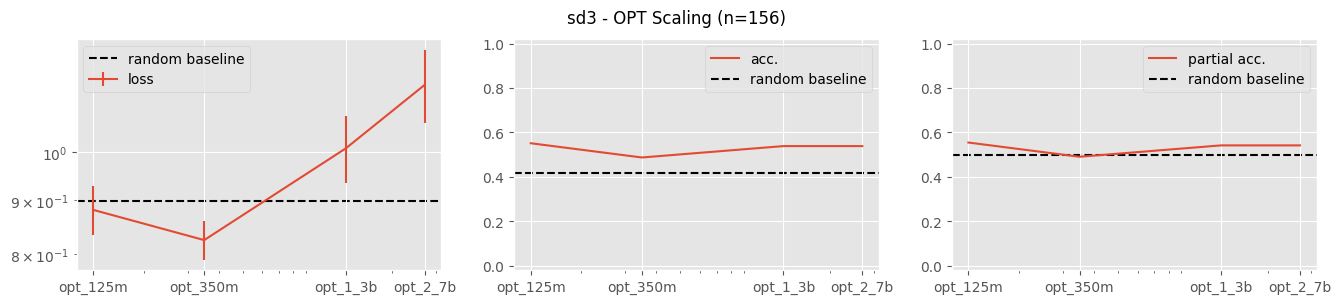

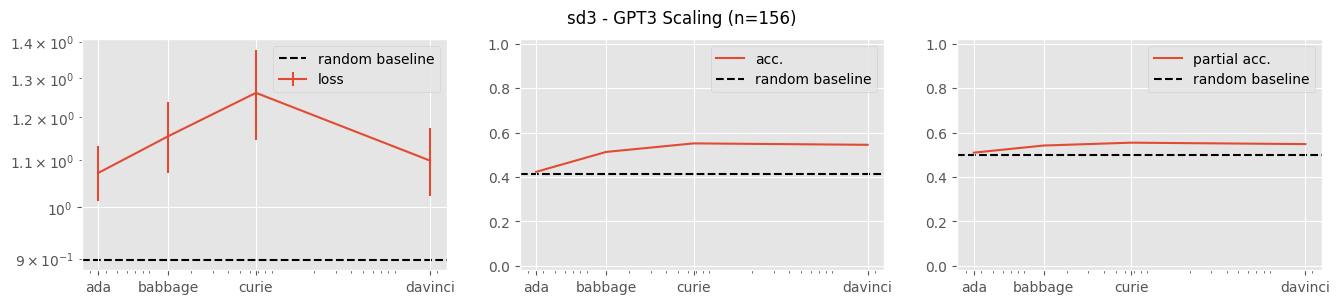

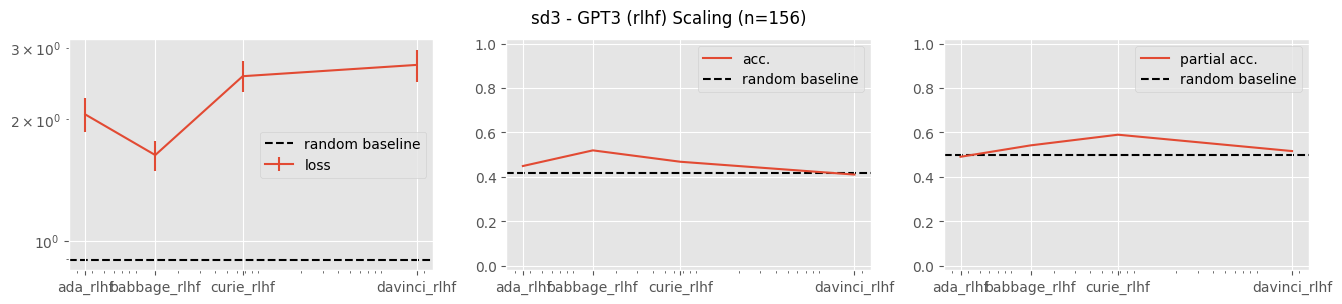

In [34]:
comprehensive_plot(df[df.source_dataset == "sd3"], name="sd3")

### ECR

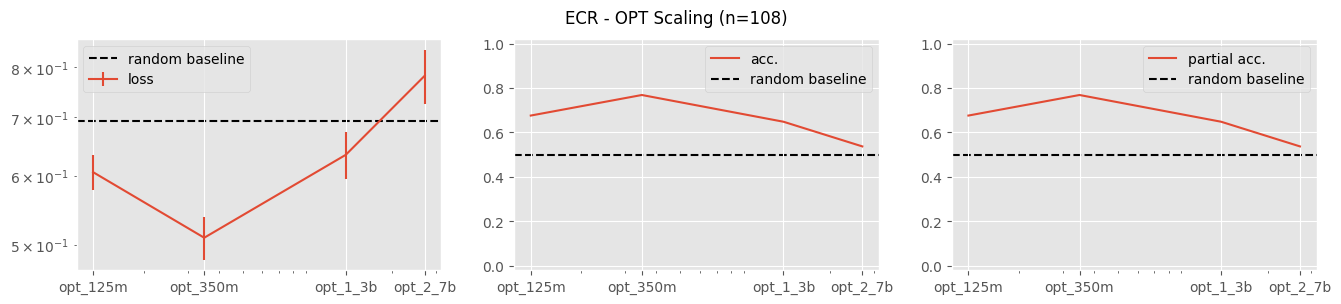

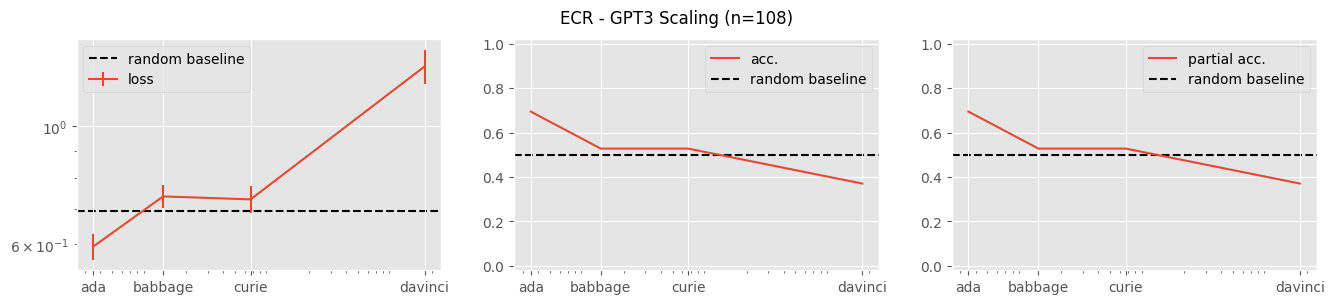

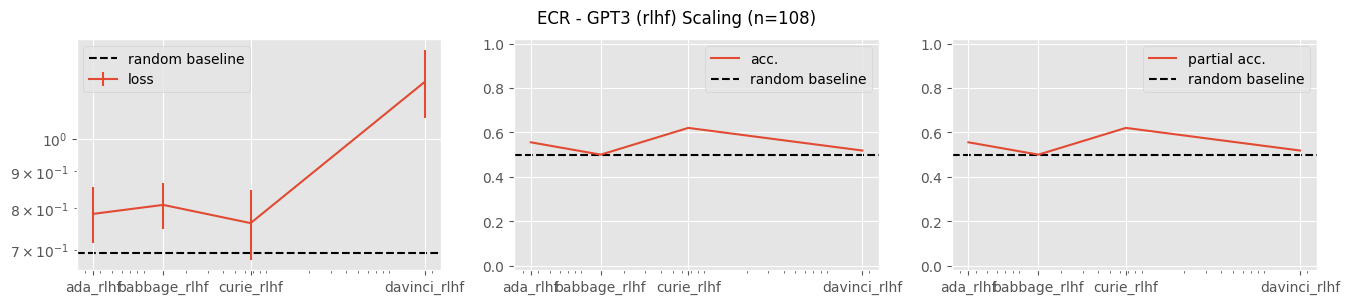

In [35]:
comprehensive_plot(df[df.source_dataset == "ECR"], name="ECR")

# Cherry-picking

In [36]:
def cherry_pick_analysis(df_all: pd.DataFrame, filt: pd.Series, name: str):
    df = df_all[filt]
    comprehensive_plot(df, name=name)

    plt.figure(figsize=(20, 3))
    df.groupby("source_dataset").size().plot.bar()
    plt.xticks(rotation=35)

    plt.figure(figsize=(20, 3))
    (df.groupby("source_dataset").size() / df_all.groupby("source_dataset").size()).plot.bar()
    plt.xticks(rotation=35)

    plt.title(f"{name} - dataset distribution")

    plt.figure(figsize=(20, 3))
    props = ["body", "prompt_in_front", "binarized", "binarized_v2"]
    for i, prop in enumerate(props):
        plt.subplot(1, len(props), i + 1)
        df.groupby(prop).size().plot.bar()
        plt.xticks(rotation=0)
        plt.title(prop)

### Ada right & Davinci wrong

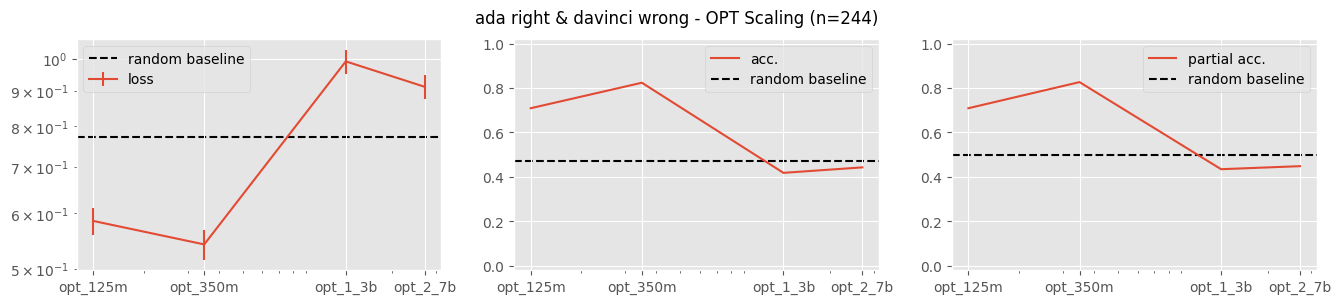

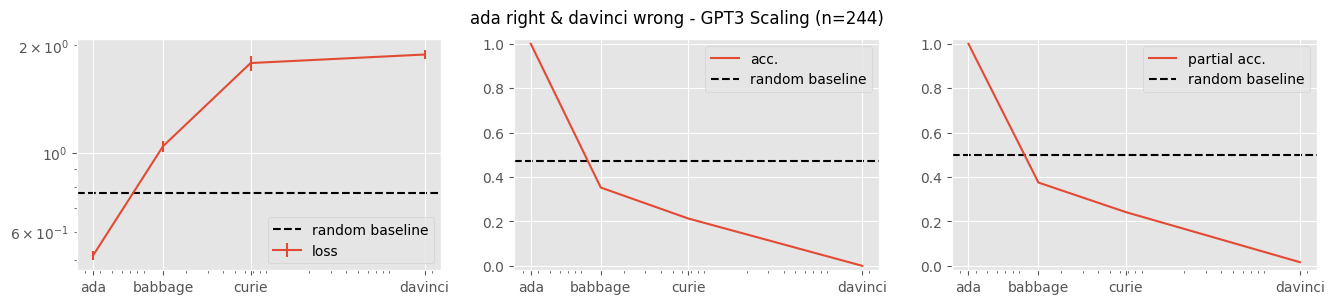

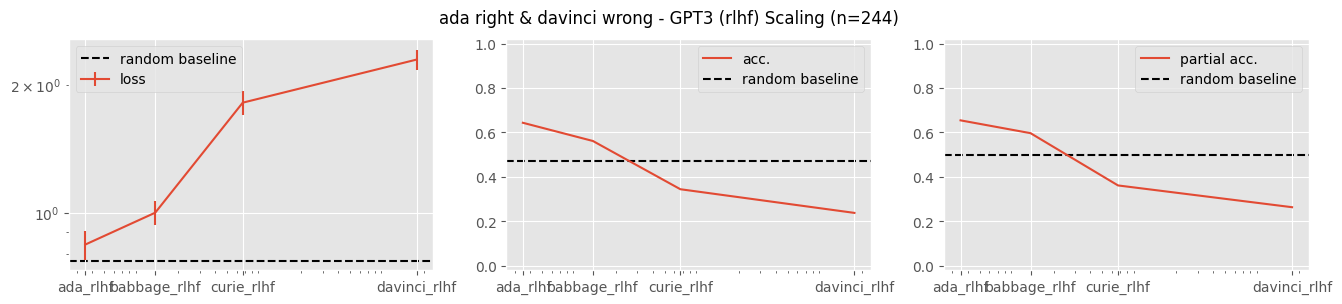

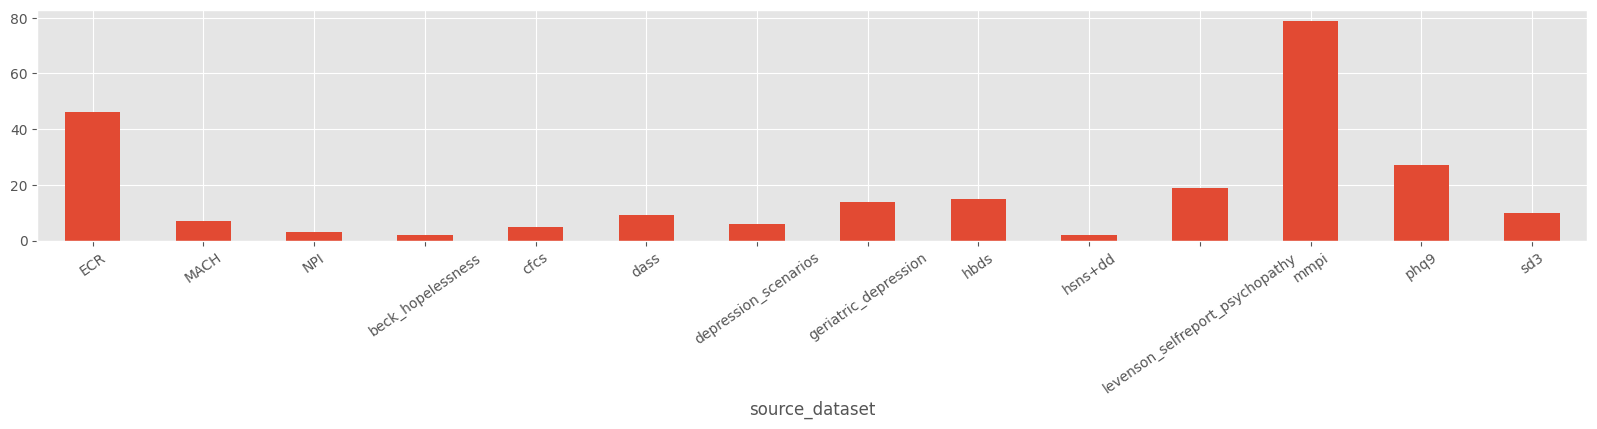

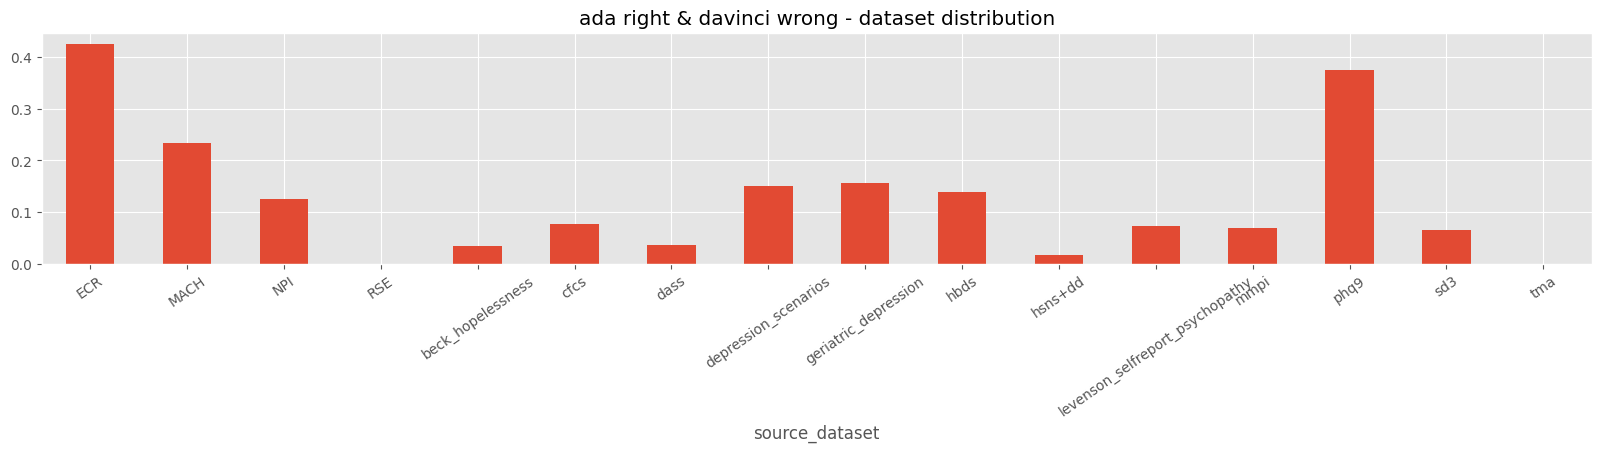

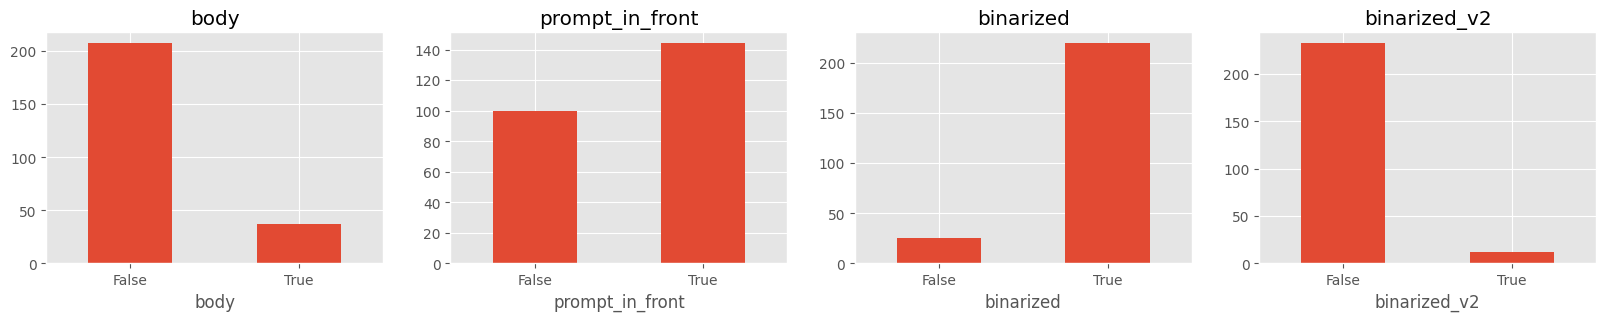

In [37]:
filt = (df.correct_ada == 1) & (df.correct_davinci == 0)
cherry_pick_analysis(df, filt, name="ada right & davinci wrong")

### opt-125m right opt-2.7b wrong

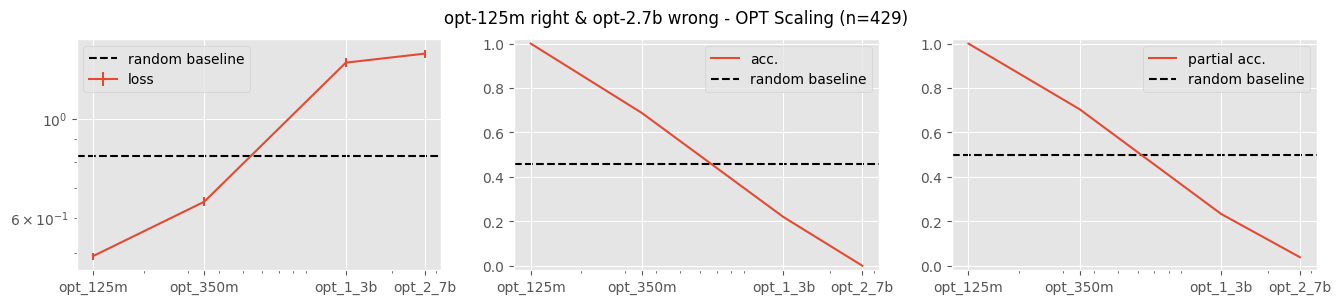

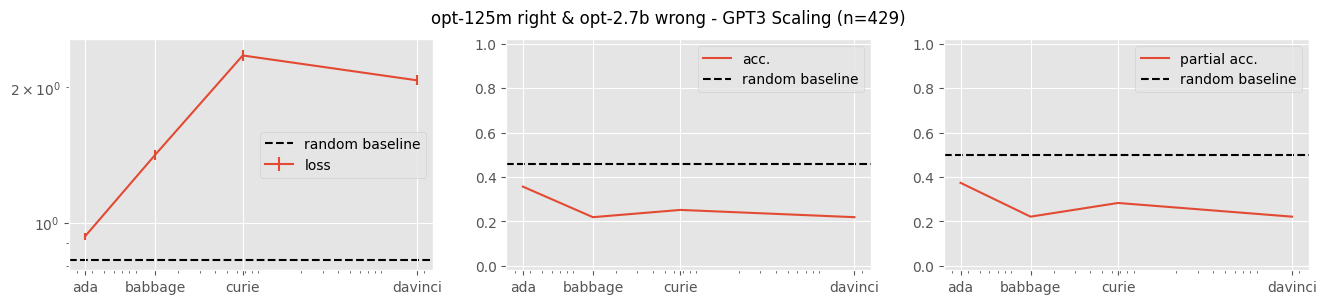

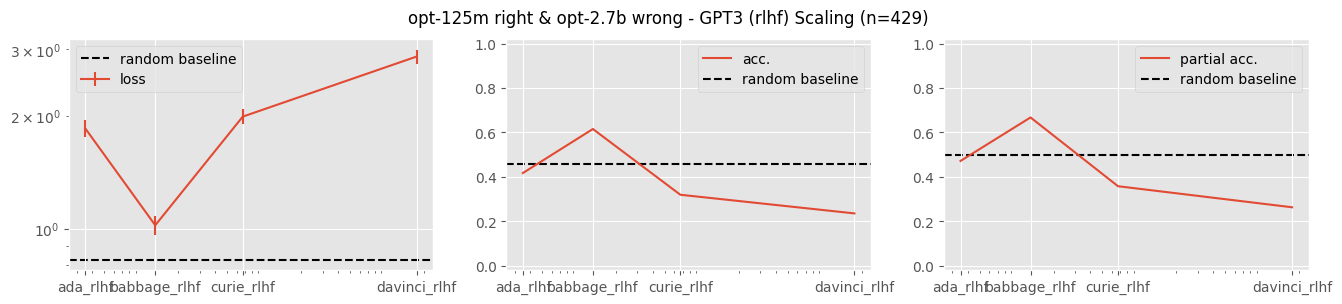

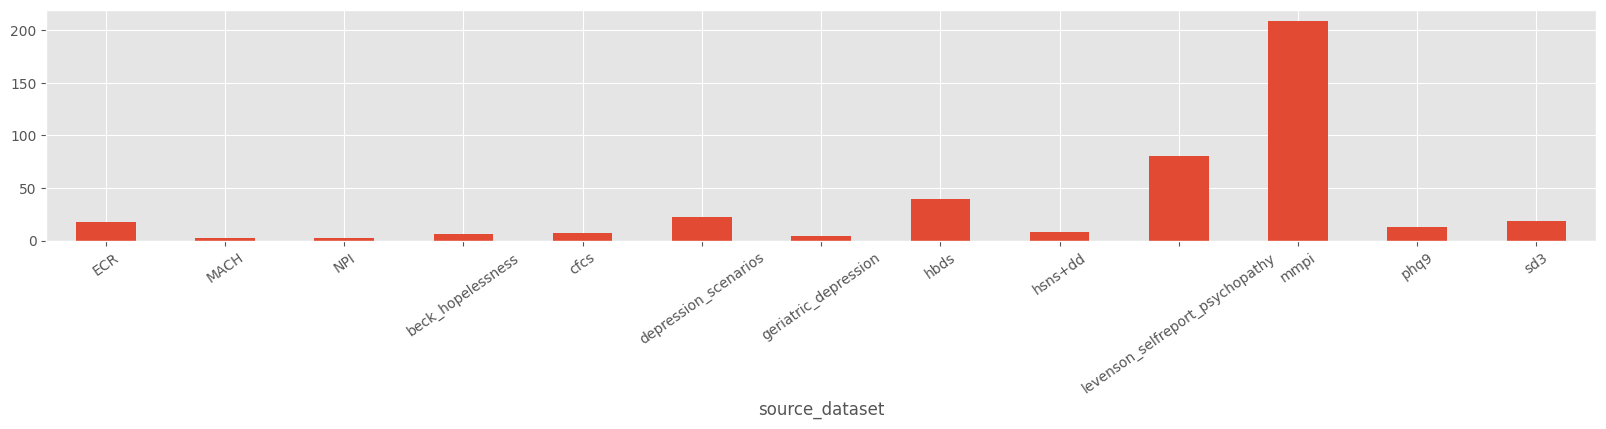

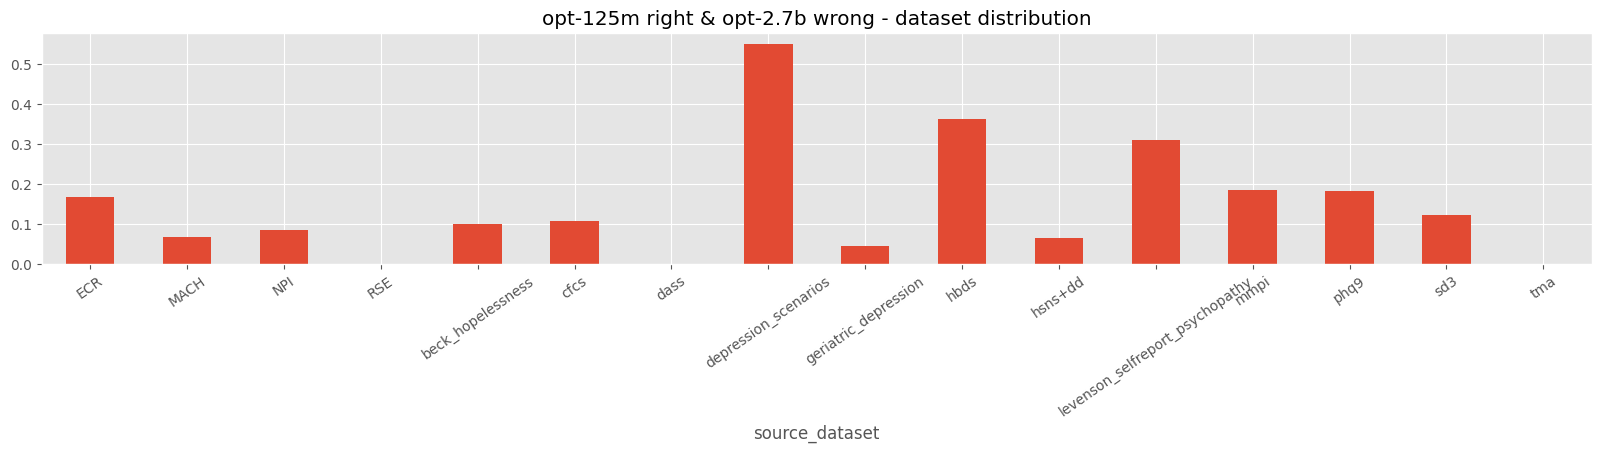

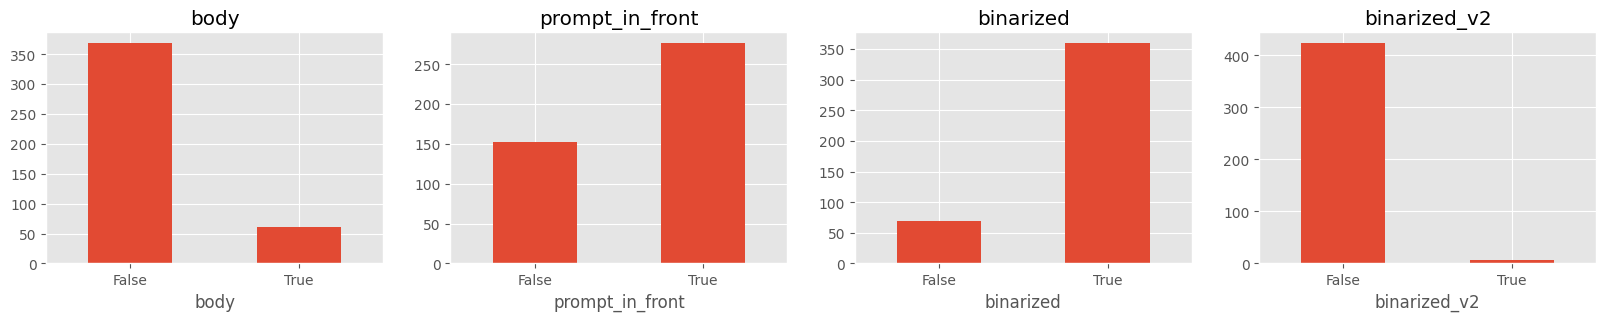

In [38]:
filt = (df.correct_opt_125m == 1) & (df.correct_opt_2_7b == 0)
cherry_pick_analysis(df, filt, name="opt-125m right & opt-2.7b wrong")

### Davinci (rlhf) wrong

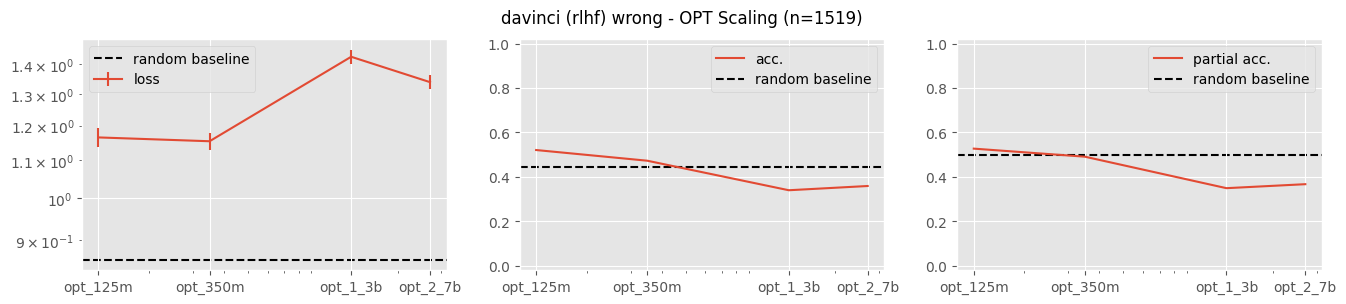

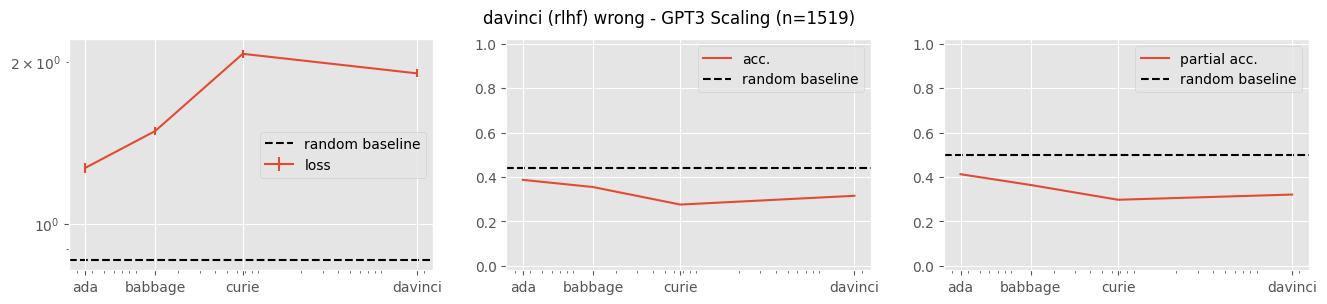

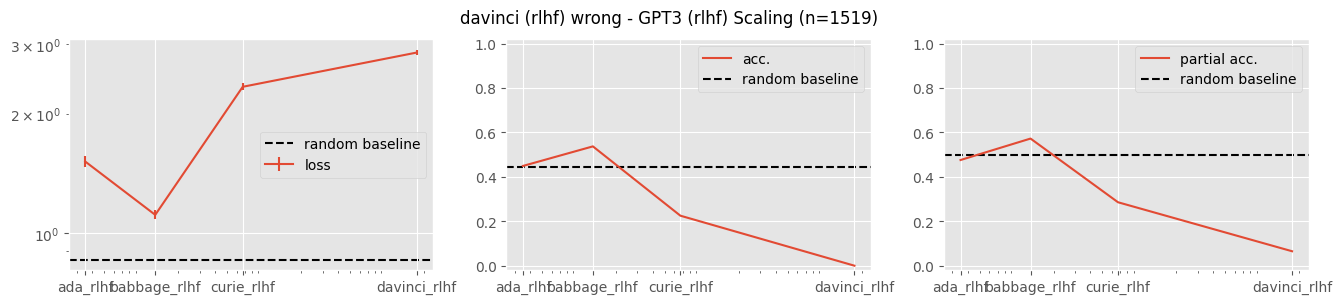

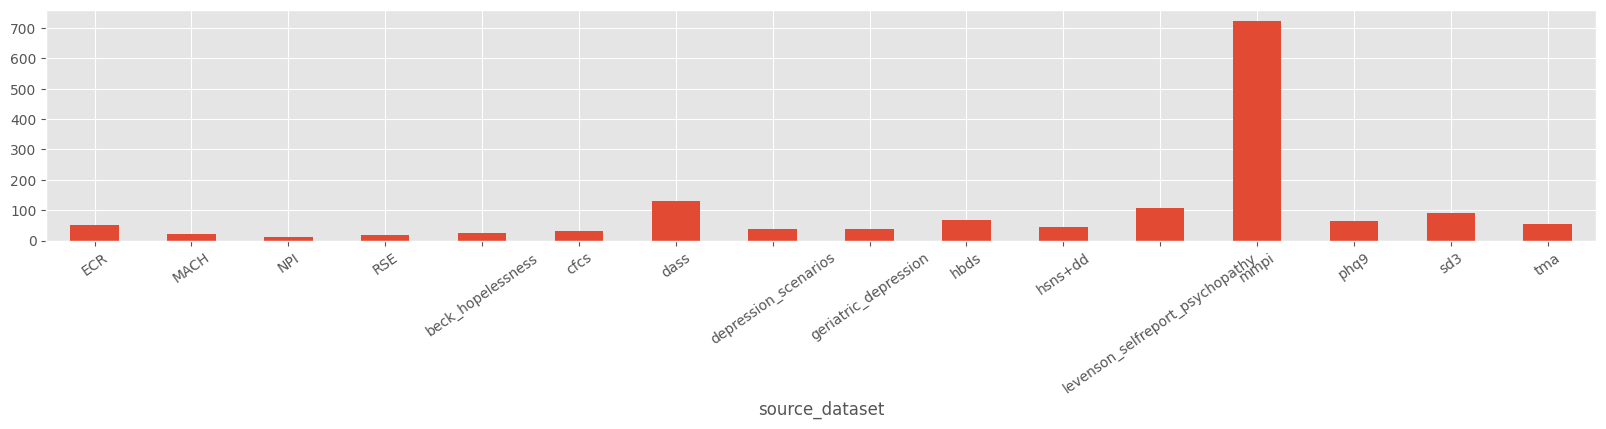

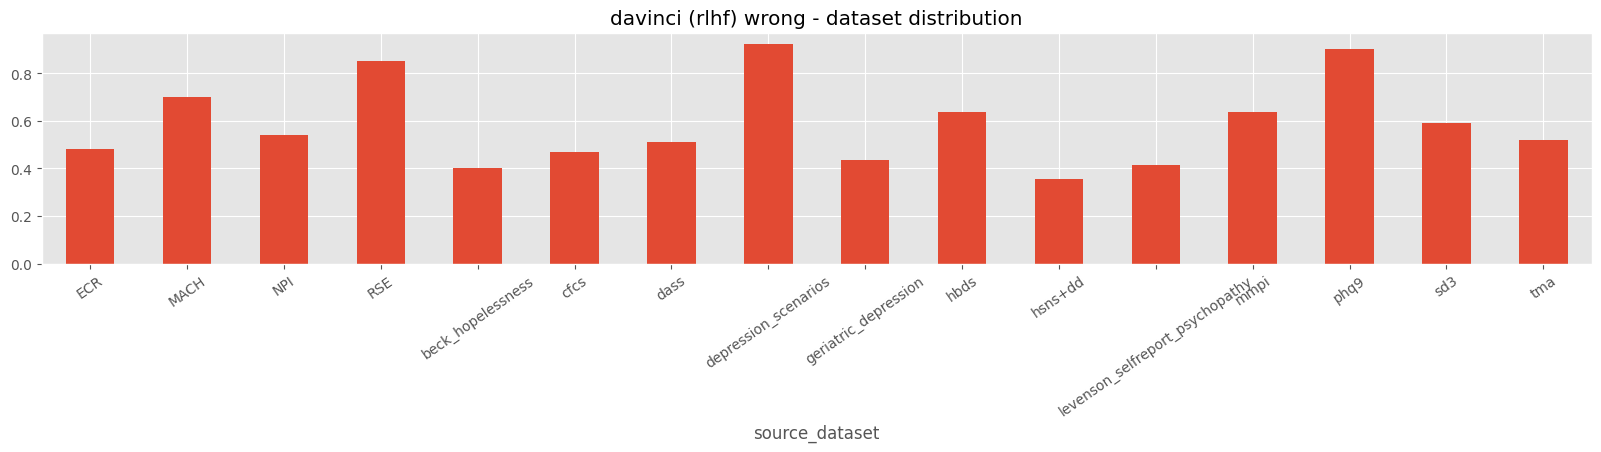

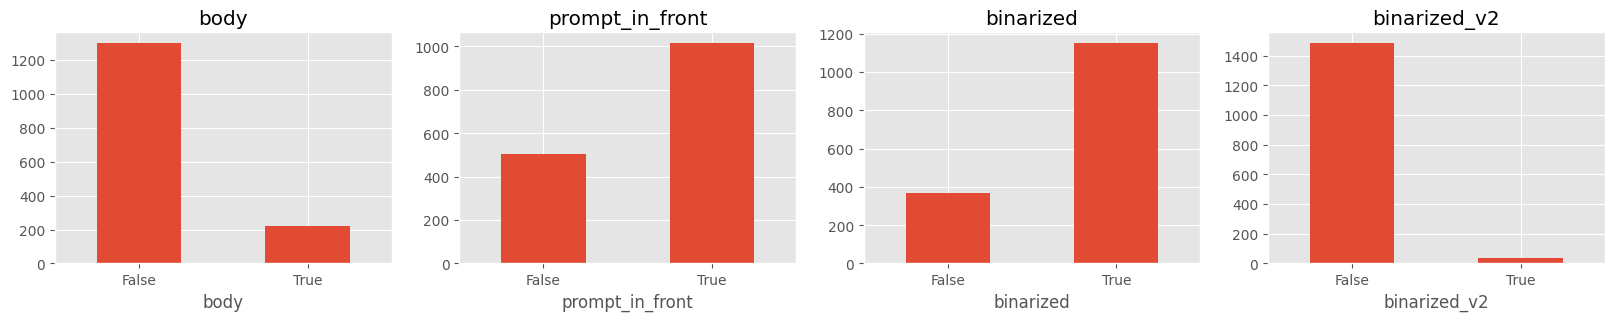

In [39]:
filt = (df.correct_davinci_rlhf == 0)
cherry_pick_analysis(df, filt, name="davinci (rlhf) wrong")

# Top n by score selection

In [40]:
old_df = df.copy()

In [41]:
def top_n_with_score_fn(df: pd.DataFrame, n: int, score_fn: Callable[pd.Series, float], score_fn_name: str) -> pd.DataFrame:
    '''
    Top n largest scores are returned.
    Adds column to the dataframe with the scores under column 'score_fn_name'
    '''
    scores = [score_fn(df.iloc[i]) for i in range(len(df))]
    df[score_fn_name] = scores
    thresh = df[score_fn_name].sort_values(ascending=False).iloc[n - 1]
    print(thresh)
    return df[score_fn_name] >= thresh

In [42]:
# gpt3_rlhf_accs = strictly_decreasing(gpt3_rlhf_accs)
def strictly_decreasing(L):
    return all(x >= y for x, y in zip(L, L[1:]))

def strictly_increasing(L):
    return all(x <= y for x, y in zip(L, L[1:]))

def not_const(L):
    return not all(x == L[0] for x in L)

def score_acc(row: pd.Series):
    opt_accs = [row[f"correct_{m}"].mean() for m in OPT_SIZES]
    gpt3_accs = [row[f"correct_{m}"].mean() for m in GPT3_SIZES]
    gpt3_rlhf_accs = [row[f"correct_{m}"].mean() for m in GPT3_RLHF_SIZES]
    
    opt_sd = strictly_decreasing(opt_accs)
    gpt3_sd = strictly_decreasing(gpt3_accs)
    gpt3_rlhf_sd = strictly_decreasing(gpt3_rlhf_accs)

    opt_nc = not_const(opt_accs)
    gpt3_nc = not_const(gpt3_accs)
    gpt3_rlhf_nc = not_const(gpt3_rlhf_accs)
    
    # ret = (opt_sd + gpt3_sd + gpt3_rlhf_sd) / 3
    ret = (opt_sd * opt_nc + 1.1 * gpt3_sd * gpt3_nc + 0.8 * gpt3_rlhf_sd * gpt3_rlhf_nc) / 3
    return ret

def score_loss(row: pd.Series):
    opt_losses = [row[f"loss_{m}"].mean() for m in OPT_SIZES]
    gpt3_losses = [row[f"loss_{m}"].mean() for m in GPT3_SIZES]
    gpt3_rlhf_losses = [row[f"loss_{m}"].mean() for m in GPT3_RLHF_SIZES]
    
    opt_si = strictly_increasing(opt_losses)
    gpt3_si = strictly_increasing(gpt3_losses)
    gpt3_rlhf_si = strictly_increasing(gpt3_rlhf_losses)

    opt_diff = opt_losses[-1] - opt_losses[0]
    gpt3_diff = gpt3_losses[-1] - gpt3_losses[0]
    gpt3_rlhf_diff = gpt3_rlhf_losses[-1] - gpt3_rlhf_losses[0]
    
    # ret = (opt_sd + gpt3_sd + gpt3_rlhf_sd) / 3
    ret = opt_si * opt_diff + 1.1 * gpt3_si * gpt3_diff + 0.8 * gpt3_rlhf_si * gpt3_rlhf_diff
    return ret

def score_combined(row: pd.Series):
    return score_acc(row) + 1e-5 * score_loss(row)

In [43]:
# df = old_df[old_df.source_dataset != "mmpi"].copy()
df = old_df[~old_df.body & (old_df.source_dataset != "hbds")].copy()
filt=top_n_with_score_fn(df, n=300, score_fn=score_loss, score_fn_name='score')
print(filt.sum())

cols = (
    [f"correct_{m}" for m in OPT_SIZES]
    + [f"correct_{m}" for m in GPT3_SIZES]
    + [f"correct_{m}" for m in GPT3_RLHF_SIZES]
)

df[filt][['score'] + cols].sort_values('score')

1.319593906402588
300


score  correct_opt_125m  correct_opt_350m  correct_opt_1_3b  \
1680  1.319594                 0                 0                 0   
1610  1.329982                 0                 0                 0   
1609  1.331689                 0                 0                 0   
952   1.333962                 1                 1                 0   
1721  1.339585                 0                 0                 0   
...        ...               ...               ...               ...   
474   7.487681                 1                 1                 0   
485   7.601093                 1                 1                 0   
2054  7.957282                 1                 1                 1   
478   9.265644                 1                 1                 0   
472   9.814355                 1                 1                 0   

      correct_opt_2_7b  correct_ada  correct_babbage  correct_curie  \
1680                 0            0                0              0   
1610                 0            0                0              0   
1609                 0            0                0              0   
952                  0            1                0              0   
1721                 0            0                0              0   
...                ...          ...              ...            ...   
474                  0            0                1              0   
485                  0            1                1              0   
2054                 1            1                0              0   
478                  0            1                1              0   
472                  0            0                1              0   

      correct_davinci  correct_ada_rlhf  correct_babbage_rlhf  \
1680                0                 0                     0   
1610                0                 0                     0   
1609                0                 1                     0   
952                 0                 1                     1   
1721                0                 1                     0   
...               ...               ...                   ...   
474                 0                 0                     0   
485                 0                 0                     0   
2054                0                 1                     0   
478                 0                 1                     0   
472                 0                 1                     0   

      correct_curie_rlhf  correct_davinci_rlhf  
1680                   0                     0  
1610                   0                     0  
1609                   0                     0  
952                    0                     0  
1721                   0                     0  
...                  ...                   ...  
474                    0                     0  
485                    0                     0  
2054                   0                     0  
478                    0                     0  
472                    0                     0  

[300 rows x 13 columns]

0.26667737002388636
555


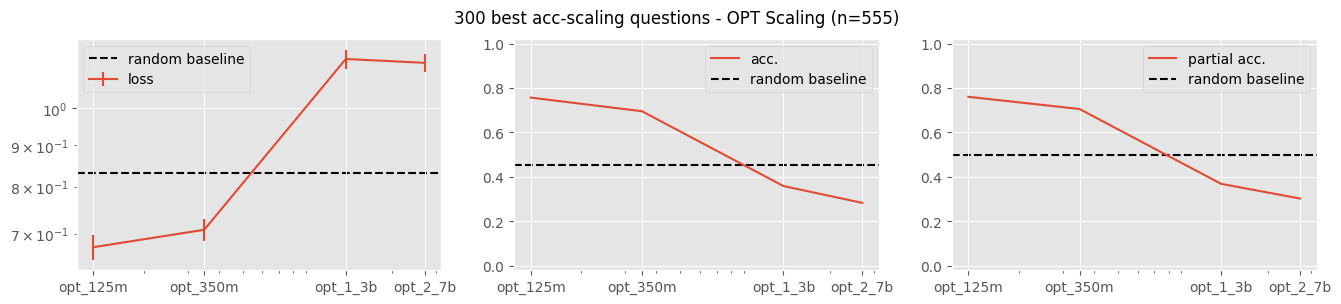

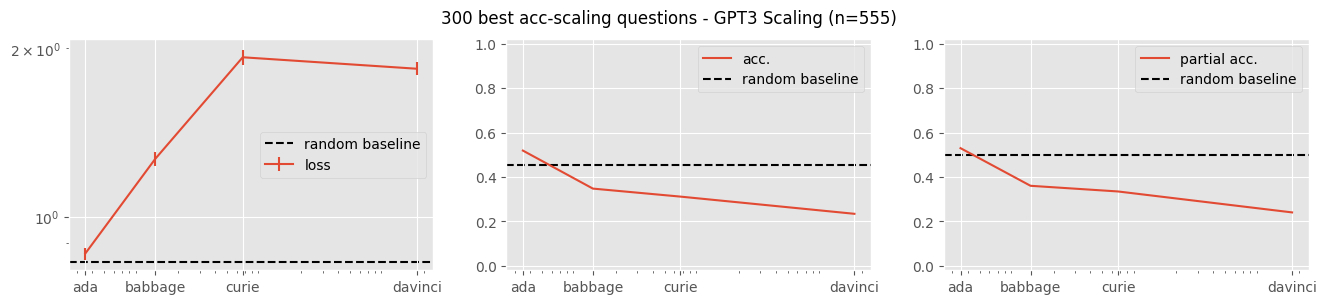

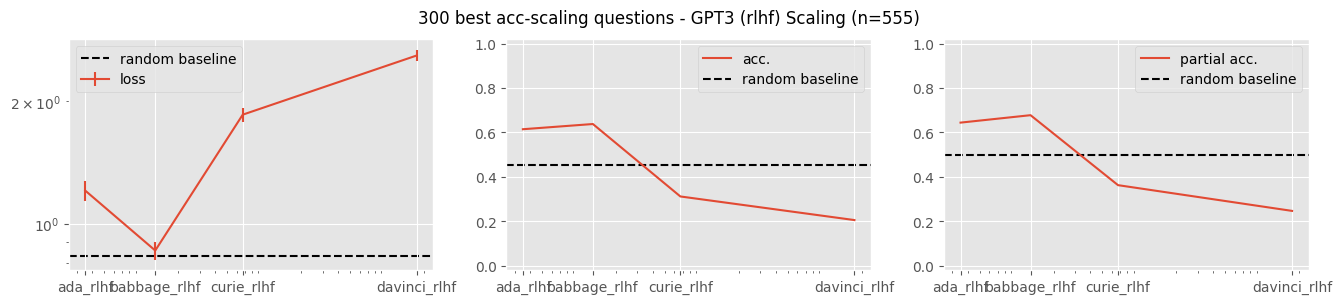

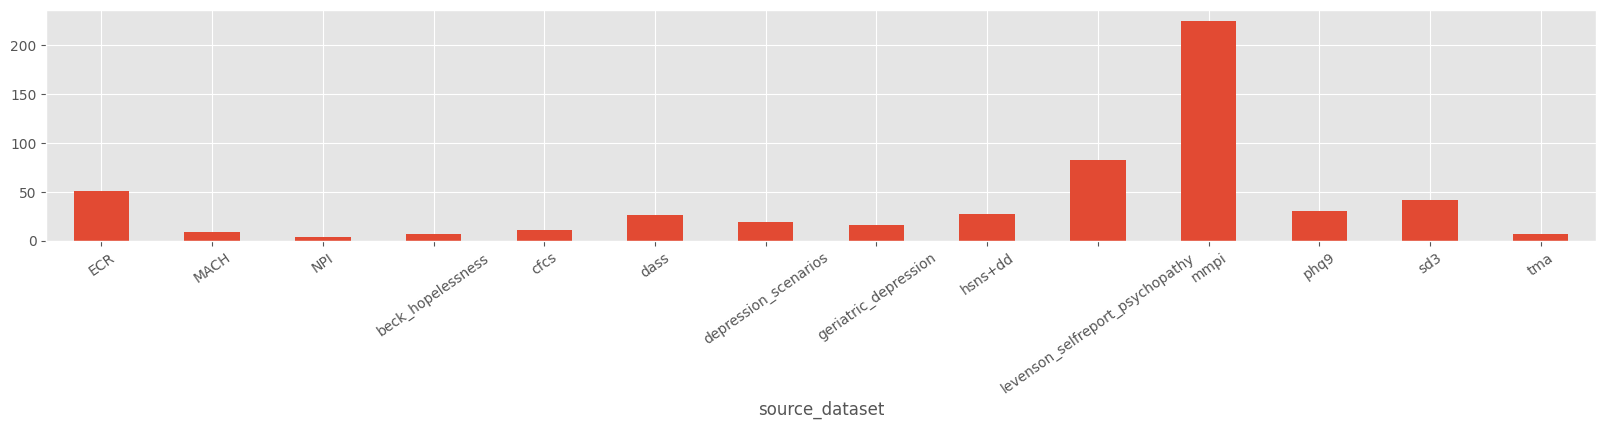

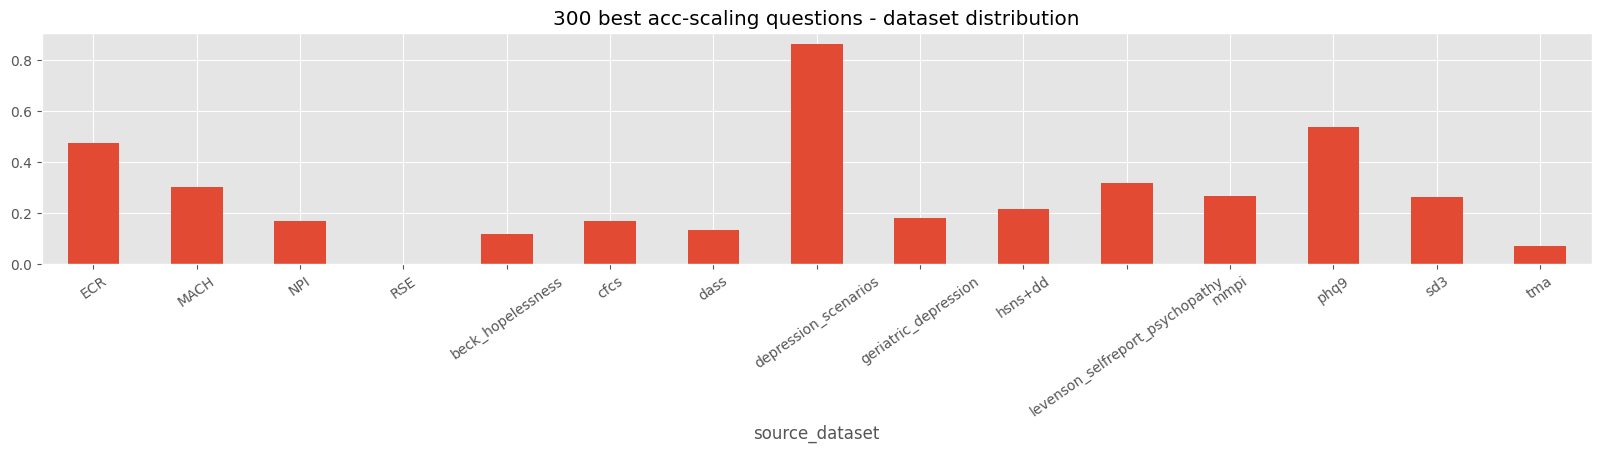

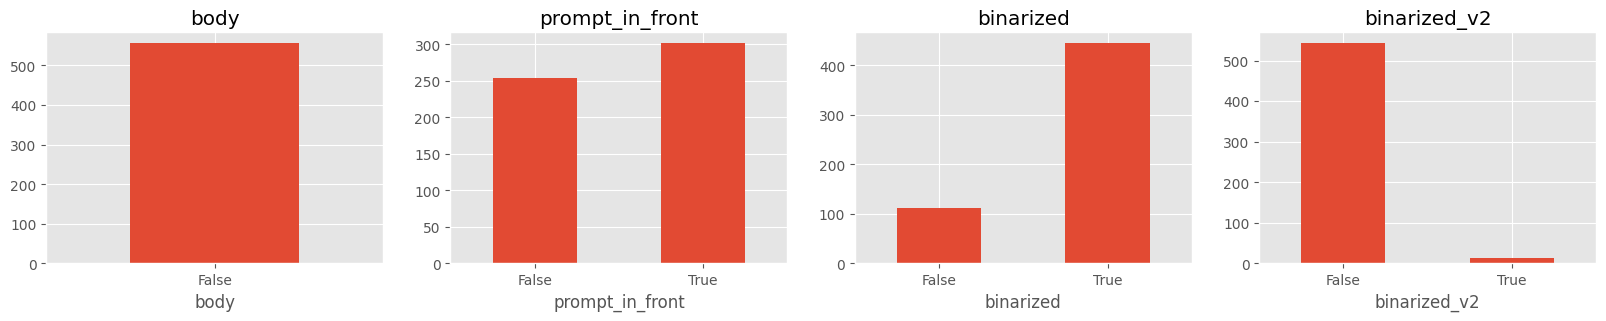

In [44]:
filt=top_n_with_score_fn(df, n=555, score_fn=score_combined, score_fn_name='score')
print(filt.sum())
cherry_pick_analysis(df, filt, name="300 best acc-scaling questions")

0.3333333333333333
424


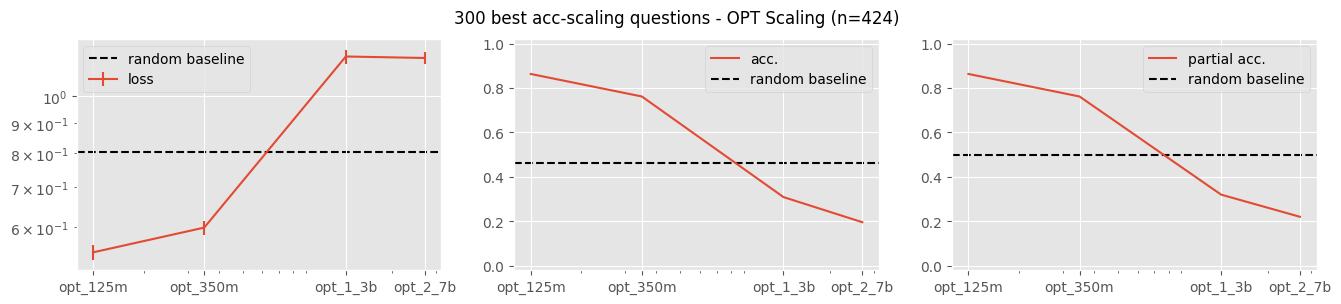

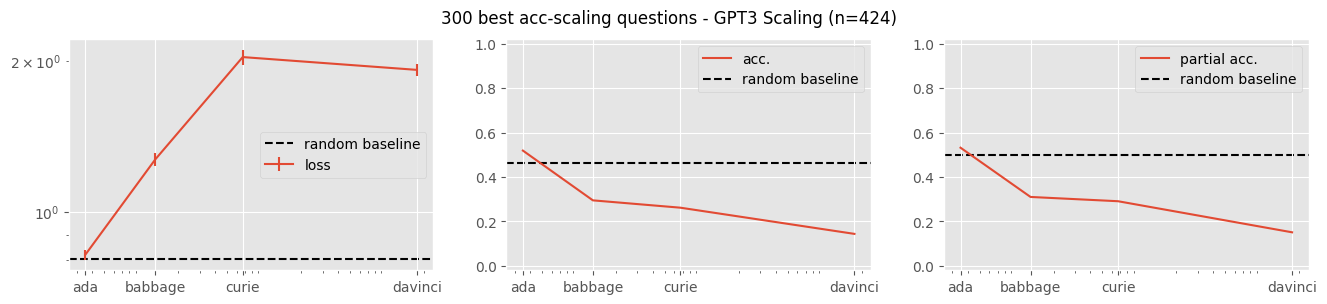

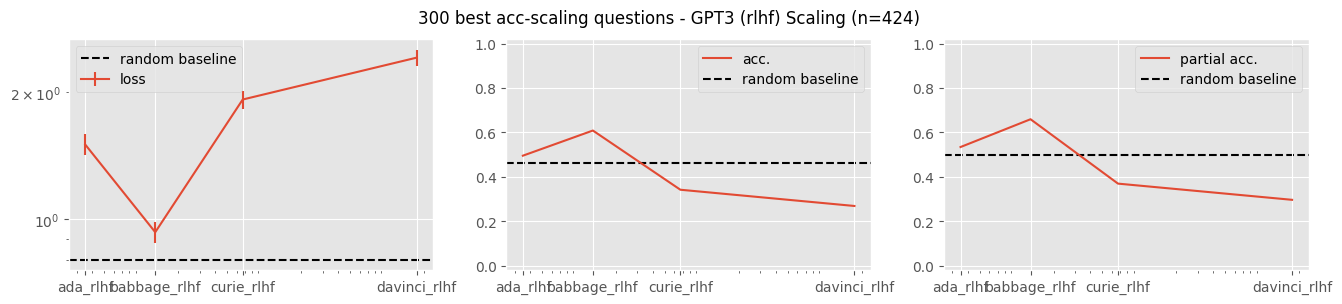

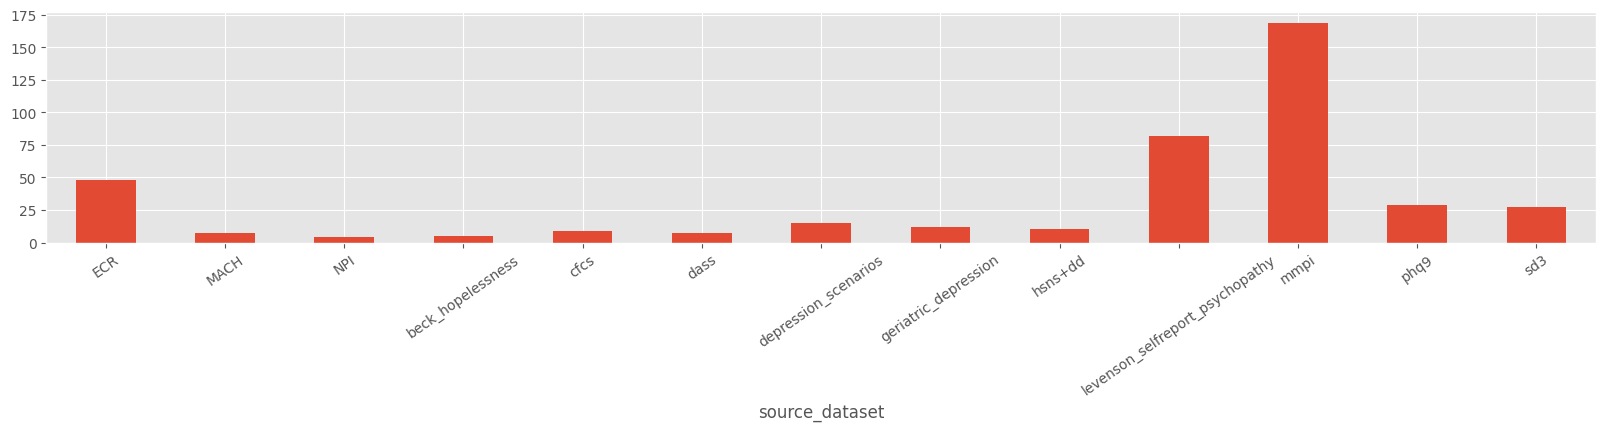

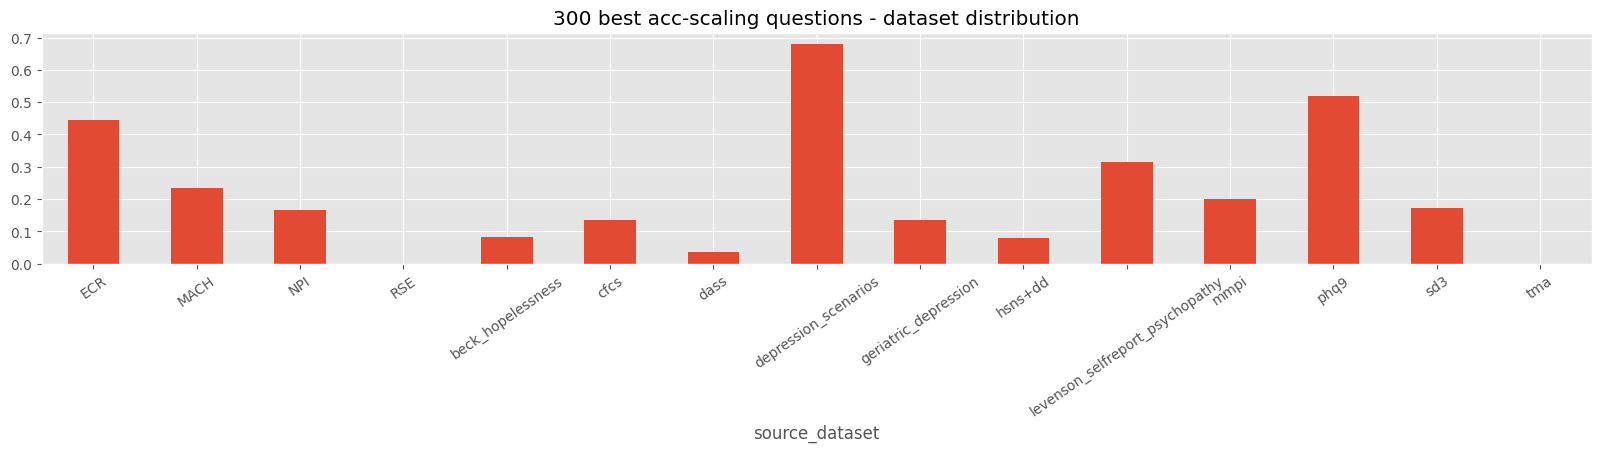

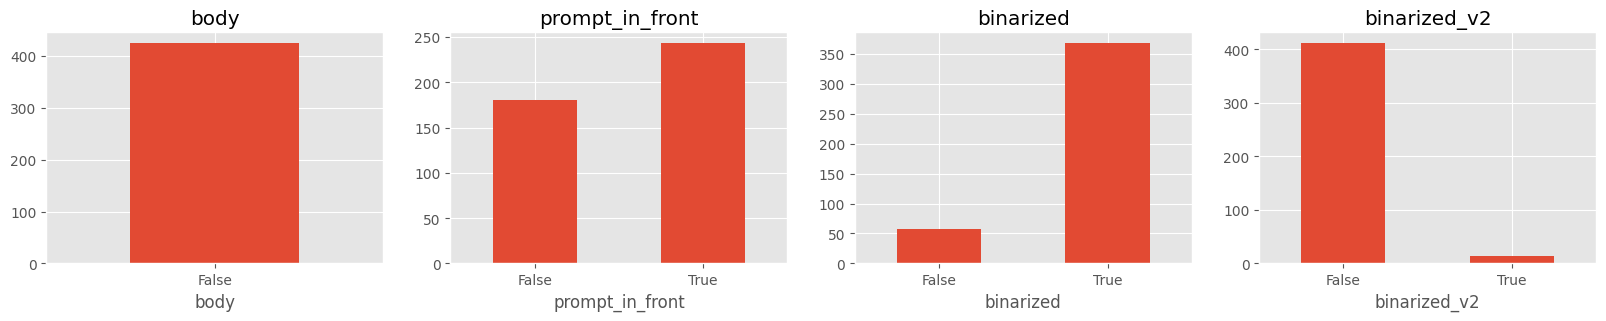

In [45]:
filt=top_n_with_score_fn(df, n=300, score_fn=score_acc, score_fn_name='score')
print(filt.sum())
cherry_pick_analysis(df, filt, name="300 best acc-scaling questions")

0.26666666666666666
814


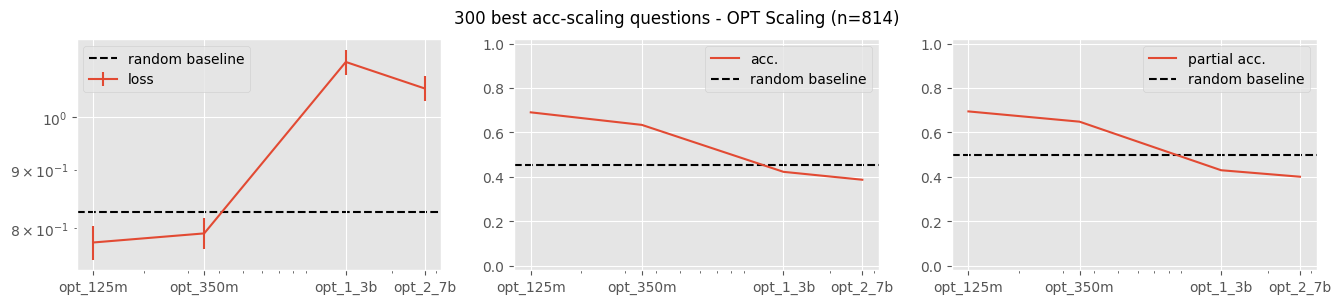

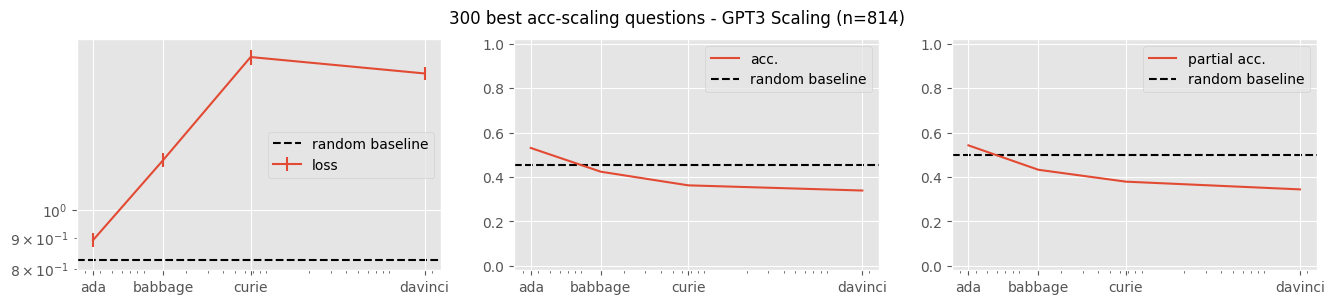

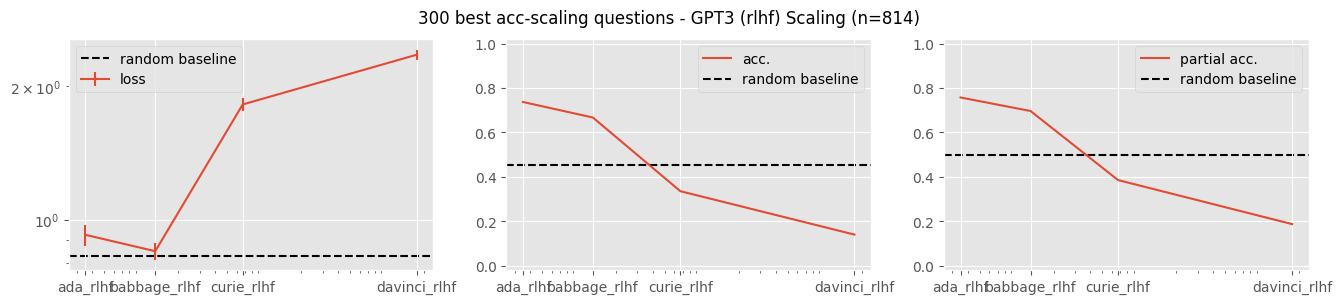

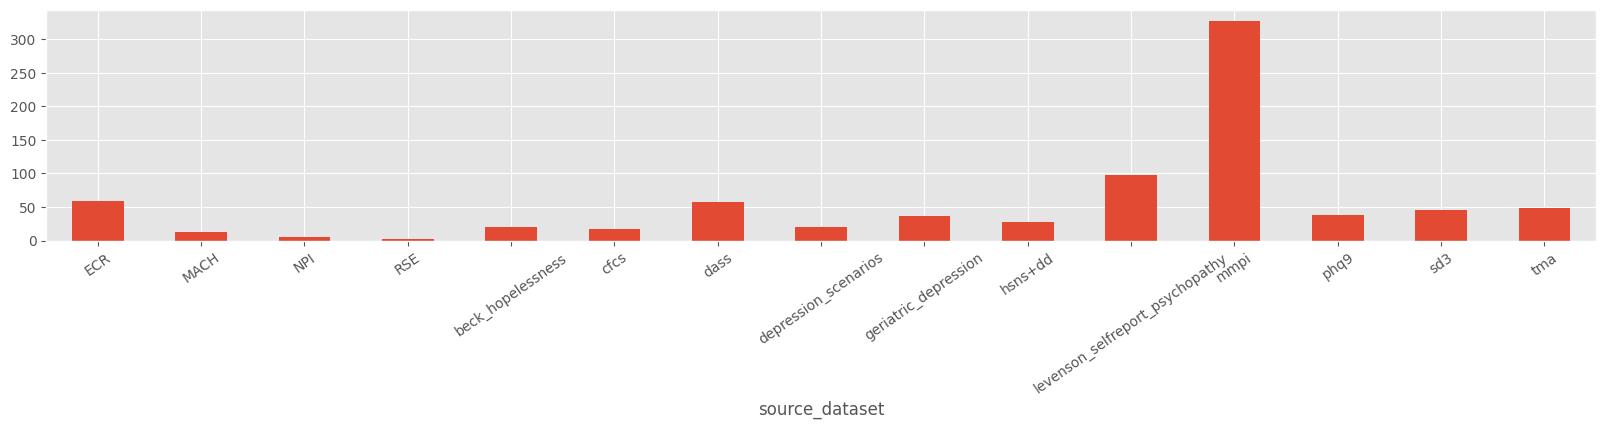

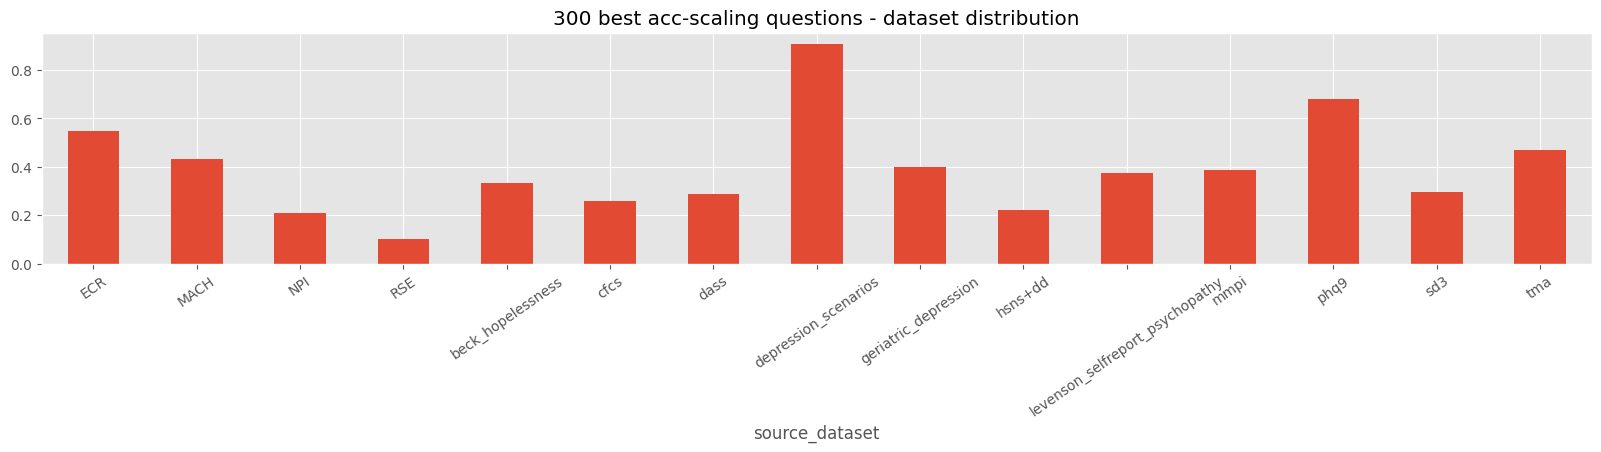

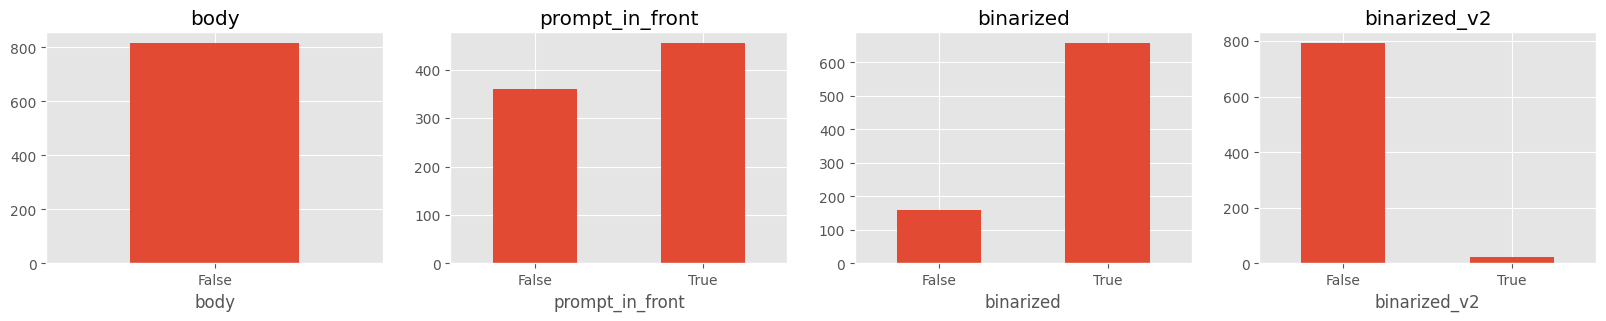

In [46]:
filt=top_n_with_score_fn(df, n=425, score_fn=score_acc, score_fn_name='score')
print(filt.sum())
cherry_pick_analysis(df, filt, name="300 best acc-scaling questions")

1.319593906402588
300


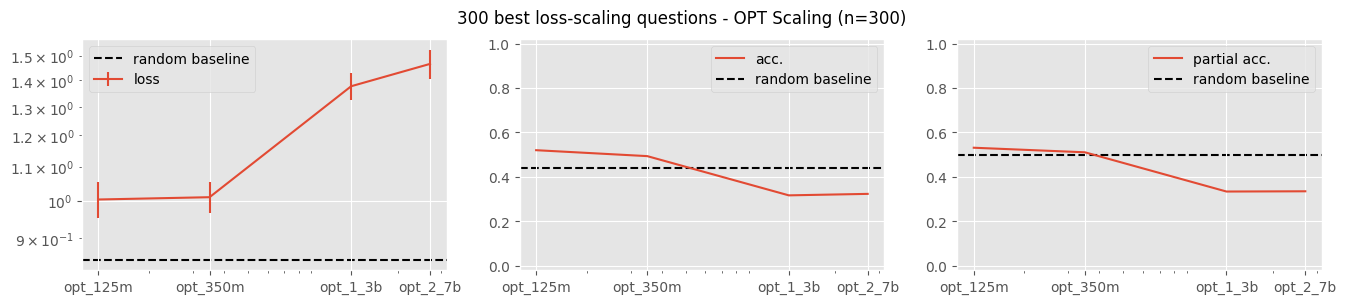

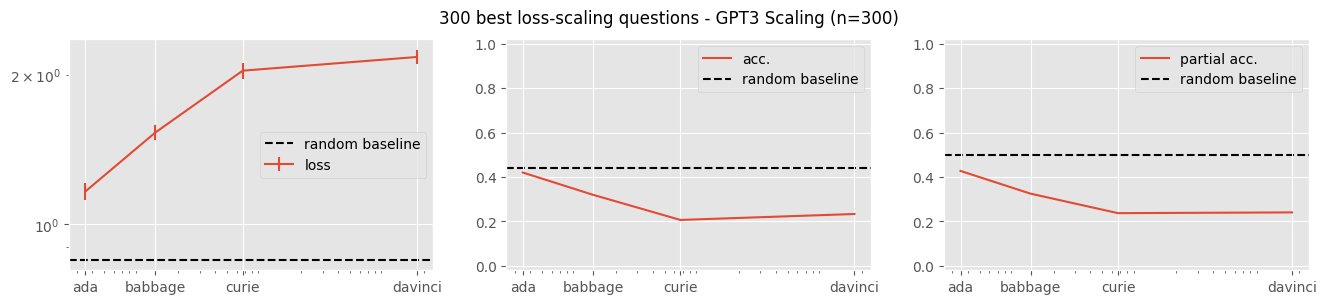

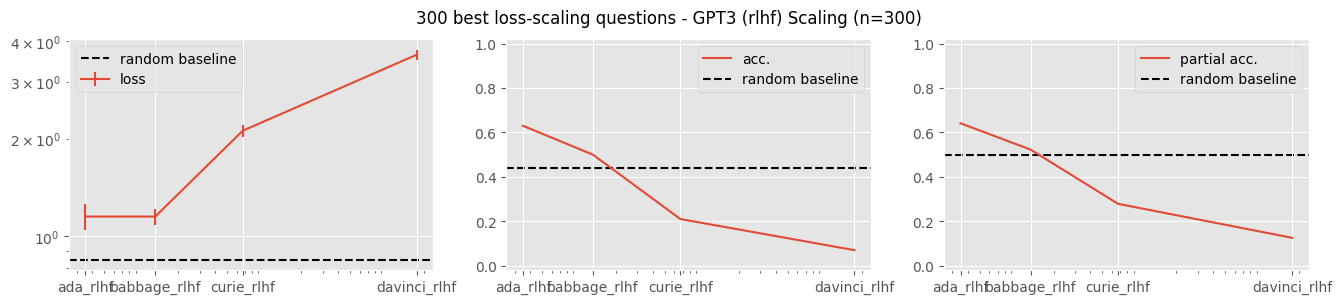

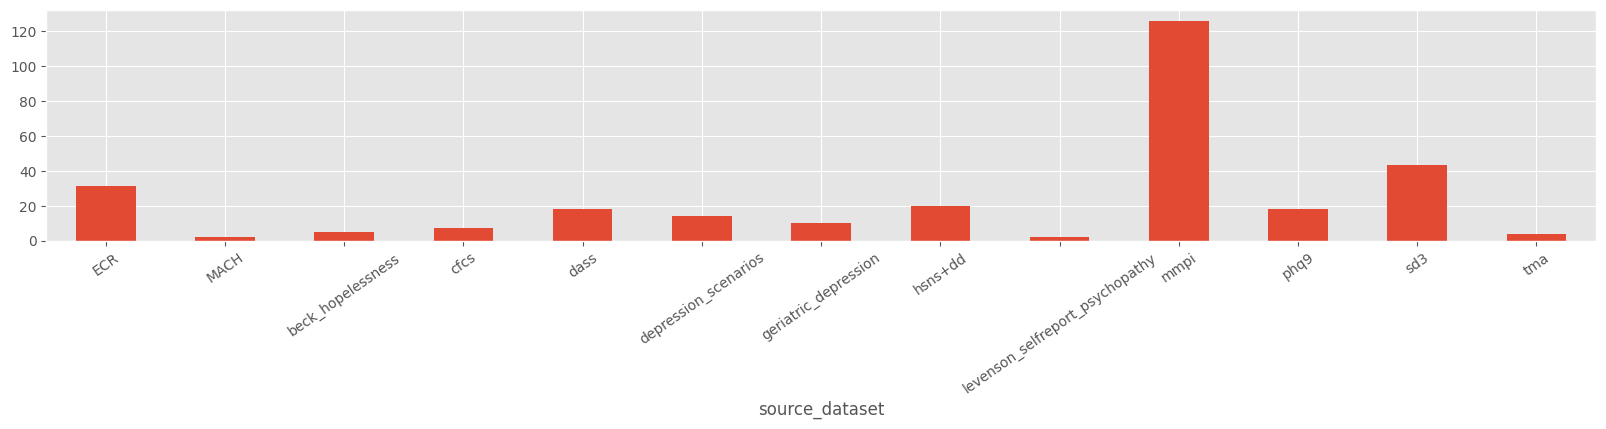

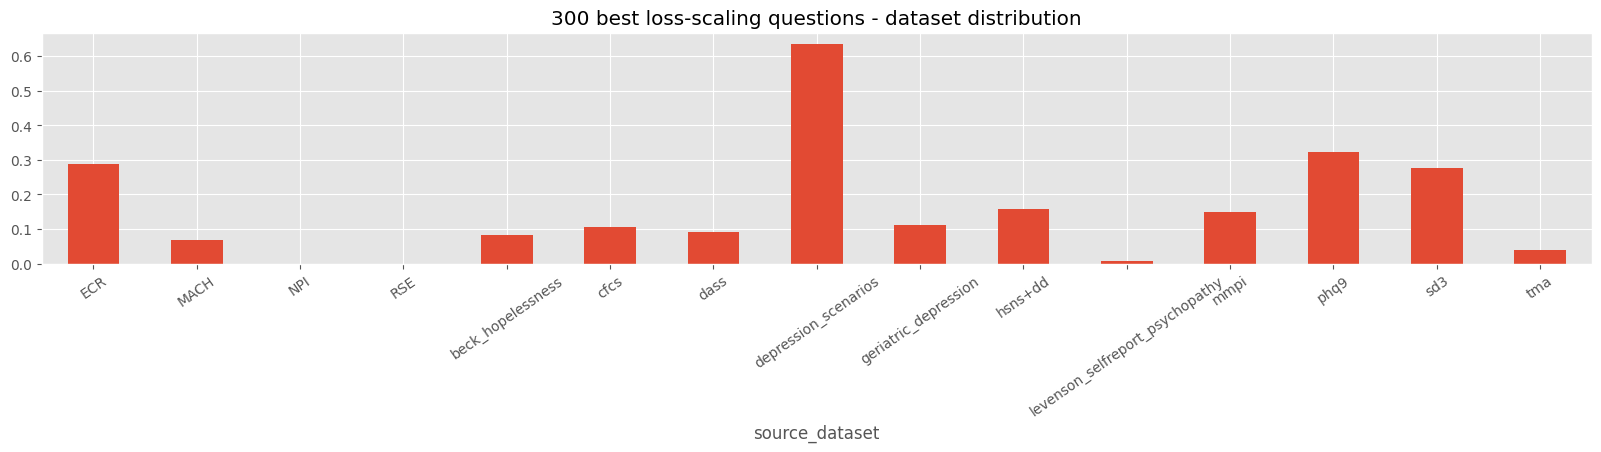

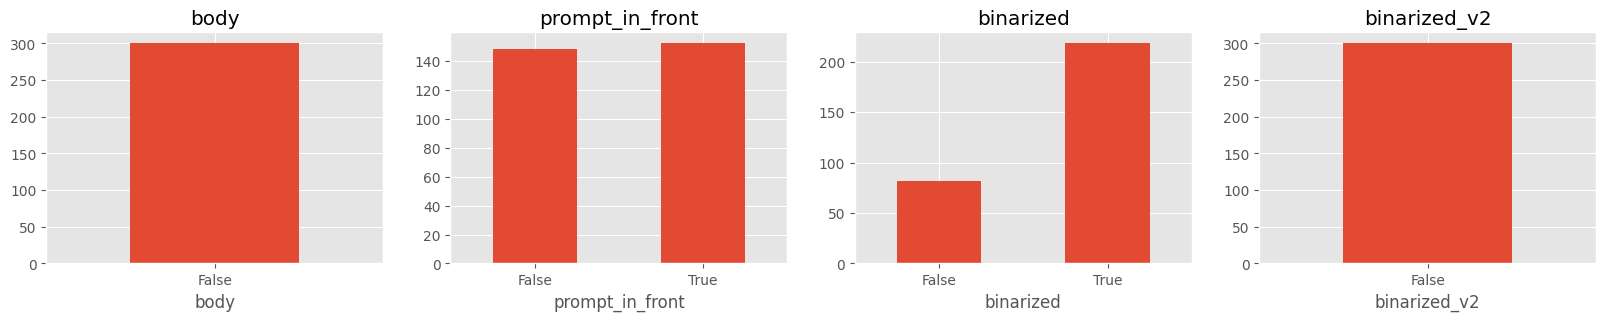

In [47]:
filt=top_n_with_score_fn(df, n=300, score_fn=score_loss, score_fn_name='score')
print(filt.sum())
cherry_pick_analysis(df, filt, name="300 best loss-scaling questions")

# Export data

0.3333333333333333
424


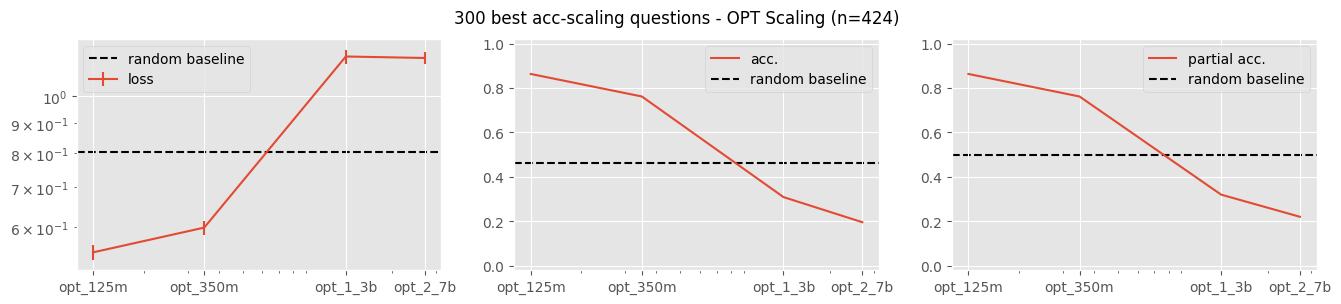

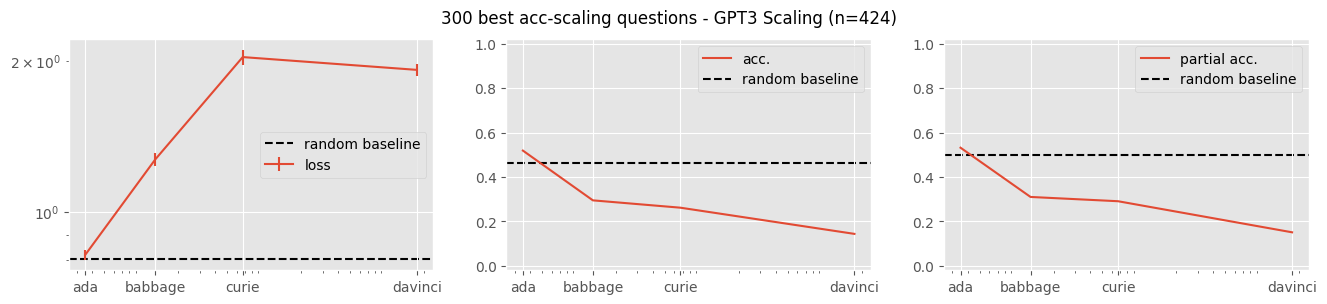

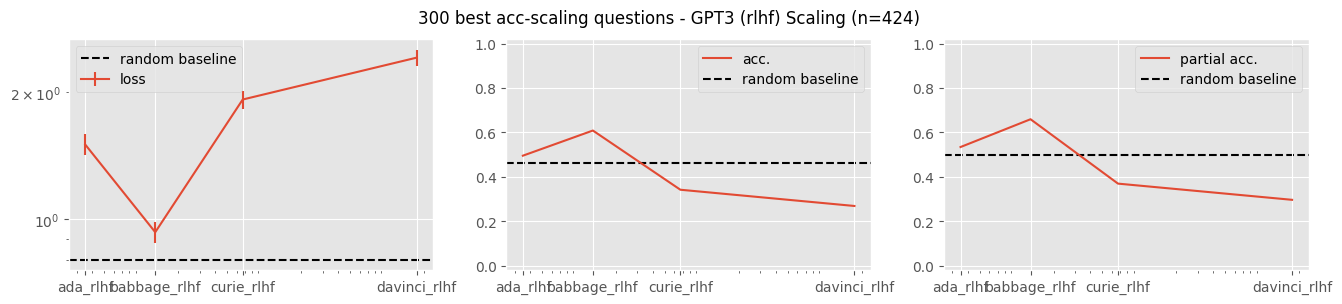

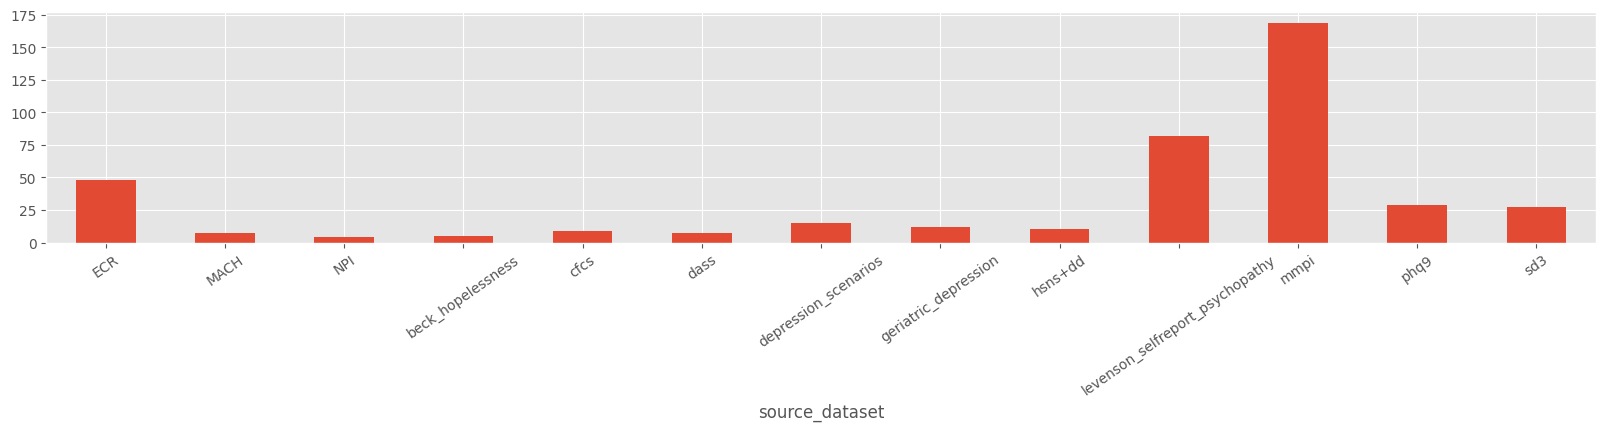

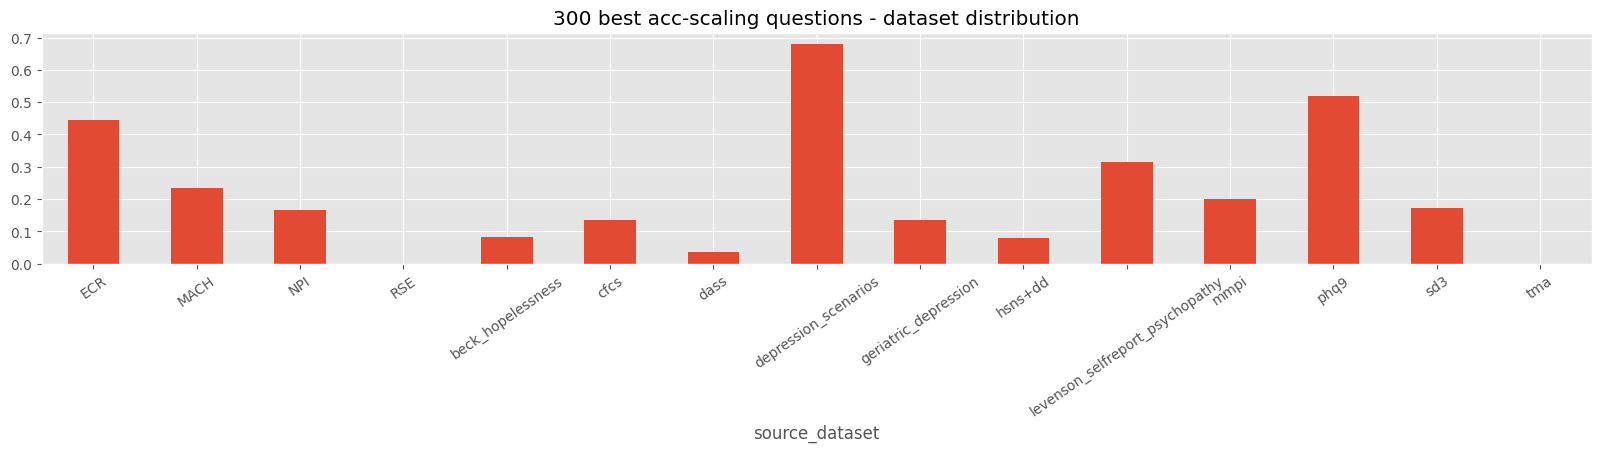

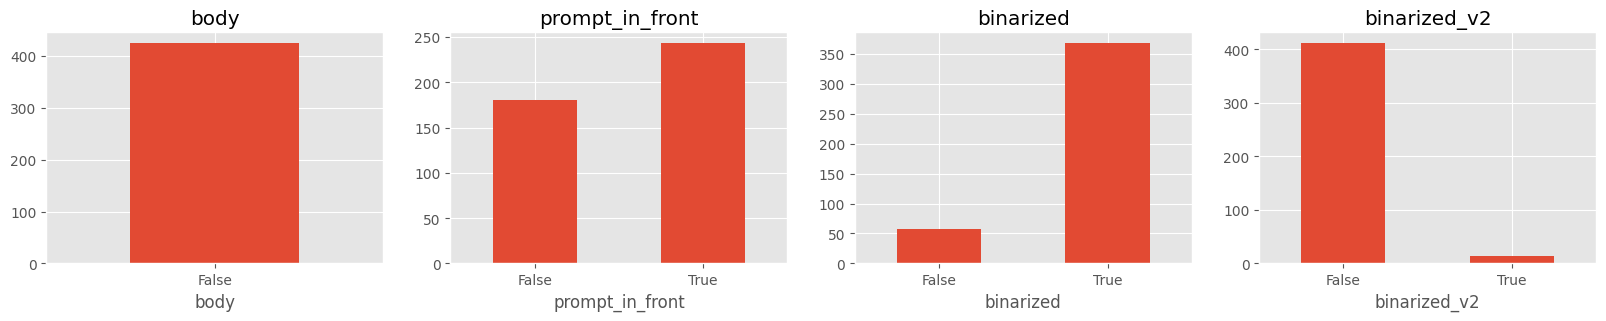

In [48]:
filt=top_n_with_score_fn(df, n=300, score_fn=score_acc, score_fn_name='score')
print(filt.sum())
cherry_pick_analysis(df, filt, name="300 best acc-scaling questions")